# DATA LOADING

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
app_data= pd.read_csv("/Users/aditykumari/Documents/application_data.csv")
prev_app= pd.read_csv("/Users/aditykumari/Documents/previous_application.csv")
pd.set_option('display.max_columns',None)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Imbalance Ratio (Application Data)

In [285]:
print('Colum Value count :','\n',app_data.TARGET.value_counts())
print('\n','Imbalance Ratio is :',len(app_data.TARGET[app_data.TARGET==1])/len(app_data.TARGET[app_data.TARGET==0]))

Colum Value count : 
 0    206250
1     20371
Name: TARGET, dtype: int64

 Imbalance Ratio is : 0.09876848484848484


In [2]:
pd.set_option('display.max_columns',None)
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Imbalance Ratio (Previous Application)

In [287]:
print('Colum Value count :','\n',prev_app.NAME_CONTRACT_STATUS.value_counts())
print('\n','Imbalance Ratio is :',len(prev_app.NAME_CONTRACT_STATUS[prev_app.NAME_CONTRACT_STATUS=='Unused offer'])/len(prev_app.NAME_CONTRACT_STATUS[prev_app.NAME_CONTRACT_STATUS=='Approved']))

Colum Value count : 
 Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

 Imbalance Ratio is : 0.025498152454568514


#### Segmenting Data

In [249]:
# Defaulter Dataset
app_data_default=app_data[app_data.TARGET==1]
# Non-Defaulter Dataset
app_data_nodef=app_data[app_data.TARGET==0]

# DATA CLEANING (Application_Data)

In [4]:
pd.set_option('display.max_rows',None)
app_data.isnull().sum() #Geting coulmns with null value

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [290]:
# Droping 12 rows from AMT_ANNUITY and 278 rows from AMT_GOODS_PRICE
# As these can be error in data and these fields cant be blank so droping decision is taken
# because compared to size of dataset no of rows to drop is low.

app_data.dropna(subset=["AMT_ANNUITY","AMT_GOODS_PRICE"],inplace=True)

# Droping unnecessary columns those are not necessary for analysis

app_data.drop(app_data.loc[:,'WEEKDAY_APPR_PROCESS_START':'HOUR_APPR_PROCESS_START'].columns,axis=1,inplace=True)
app_data.drop(["LIVE_REGION_NOT_WORK_REGION"],axis=1,inplace=True)
app_data.drop(app_data.loc[:,'EXT_SOURCE_1':'EMERGENCYSTATE_MODE'].columns,axis=1,inplace=True)
app_data.drop(app_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns,axis=1,inplace=True)

In [6]:
# Imputing the null values of columb NAME_TYPE_SUITE to
# Unaccompained as it has the higest % in overall data, also its the most logical group to fill the null in this case.
print(app_data.NAME_TYPE_SUITE.value_counts(normalize=True)*100)

app_data.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

Unaccompanied      81.159151
Family             13.111392
Spouse, partner     3.713174
Children            1.066925
Other_B             0.578040
Other_A             0.282815
Group of people     0.088502
Name: NAME_TYPE_SUITE, dtype: float64


In [241]:
#Changing the negative values to Absolute value in some column
app_data.DAYS_BIRTH =app_data.DAYS_BIRTH.abs()
app_data.DAYS_EMPLOYED =app_data.DAYS_EMPLOYED.abs()
app_data.DAYS_REGISTRATION =app_data.DAYS_REGISTRATION.abs()
app_data.DAYS_ID_PUBLISH =app_data.DAYS_ID_PUBLISH.abs()
app_data.DAYS_LAST_PHONE_CHANGE =app_data.DAYS_LAST_PHONE_CHANGE.abs()

In [227]:
# Changing 0 from CNT_CHILDREN to null
app_data.loc[app_data.CNT_CHILDREN==0,'CNT_CHILDREN']=np.nan

#### Treating outliers

In [179]:
# Outlier check
print('Set_1')
for i in range(len(Set_1)):
    if app_data[Set_1[i]].dtype != object:
        print(app_data[Set_1[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_2')
for i in range(len(Set_2)):
    if app_data[Set_2[i]].dtype != object:
        print(app_data[Set_2[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_3')
for i in range(len(Set_3)):
    if app_data[Set_3[i]].dtype != object:
        print(app_data[Set_3[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_4')
for i in range(len(Set_4)):
    if app_data[Set_4[i]].dtype != object:
        print(app_data[Set_4[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_5')
for i in range(len(Set_5)):
    if app_data[Set_5[i]].dtype != object:
        print(app_data[Set_5[i]].quantile([.5,.7,.9,.99,1]))

Set_1
0.50    157500.0
0.70    184500.0
0.90    270000.0
0.99    414000.0
1.00    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64
0.50     506889.0
0.70     722430.0
0.90    1095111.0
0.99    1530000.0
1.00    1795203.0
Name: AMT_CREDIT, dtype: float64
0.50    25150.5
0.70    31653.0
0.90    43465.5
0.99    58810.5
1.00    66978.0
Name: AMT_ANNUITY, dtype: float64
0.50     450000.0
0.70     675000.0
0.90     927000.0
0.99    1350000.0
1.00    1530000.0
Name: AMT_GOODS_PRICE, dtype: float64

 Set_2
0.50    0.0
0.70    1.0
0.90    2.0
0.99    3.0
1.00    3.0
Name: CNT_CHILDREN, dtype: float64
0.50    2.0
0.70    3.0
0.90    4.0
0.99    5.0
1.00    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

 Set_3
0.50    14522.0
0.70    16902.0
0.90    19777.0
0.99    22958.0
1.00    25200.0
Name: DAYS_BIRTH, dtype: float64
0.50     1648.0
0.70     2787.0
0.90     5329.0
0.99    11339.0
1.00    17912.0
Name: DAYS_EMPLOYED, dtype: float64
0.50     4321.0
0.70     6328.0
0.90     9258.0
0.99    12886.0
1.0

In [247]:
# Droping Outliers as they are hindering with visulisation and anlysis.
app_data.drop(app_data[app_data.AMT_INCOME_TOTAL>app_data.AMT_INCOME_TOTAL.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_CREDIT>app_data.AMT_CREDIT.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_ANNUITY>app_data.AMT_ANNUITY.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_GOODS_PRICE>app_data.AMT_GOODS_PRICE.quantile(.99)].index,inplace=True)

app_data.drop(app_data[app_data.CNT_CHILDREN>app_data.CNT_CHILDREN.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.CNT_FAM_MEMBERS>app_data.CNT_FAM_MEMBERS.quantile(.99)].index,inplace=True)

# Here we are droping huge no of rows as they have irelevent data.
app_data.drop(app_data[app_data.DAYS_EMPLOYED>app_data.DAYS_EMPLOYED.quantile(.81)].index,inplace=True)
app_data.drop(app_data[app_data.DAYS_REGISTRATION>app_data.DAYS_REGISTRATION.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.DAYS_LAST_PHONE_CHANGE>app_data.DAYS_LAST_PHONE_CHANGE.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.DAYS_ID_PUBLISH>app_data.DAYS_ID_PUBLISH.quantile(.99)].index,inplace=True)

app_data.drop(app_data[app_data.AMT_REQ_CREDIT_BUREAU_DAY>app_data.AMT_REQ_CREDIT_BUREAU_DAY.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_REQ_CREDIT_BUREAU_WEEK>app_data.AMT_REQ_CREDIT_BUREAU_WEEK.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_REQ_CREDIT_BUREAU_MON>app_data.AMT_REQ_CREDIT_BUREAU_MON.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_REQ_CREDIT_BUREAU_QRT>app_data.AMT_REQ_CREDIT_BUREAU_QRT.quantile(.99)].index,inplace=True)
app_data.drop(app_data[app_data.AMT_REQ_CREDIT_BUREAU_YEAR>app_data.AMT_REQ_CREDIT_BUREAU_YEAR.quantile(.99)].index,inplace=True)

In [157]:
# Creating Sets for analyis 
Sets=["Set_1","Set_2","Set_3","Set_4","Set_5"]
Set_1=["NAME_CONTRACT_TYPE","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]
Set_2=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","CNT_FAM_MEMBERS"]
Set_3=["NAME_TYPE_SUITE","NAME_INCOME_TYPE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","OCCUPATION_TYPE"]
Set_4=["DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_CONT_MOBILE","LIVE_CITY_NOT_WORK_CITY","DAYS_LAST_PHONE_CHANGE"]
Set_5=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_DAY"]


### Univariate Analysis (Set_1)

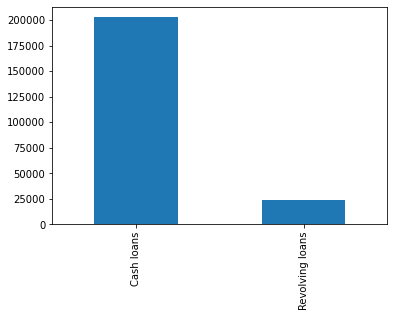

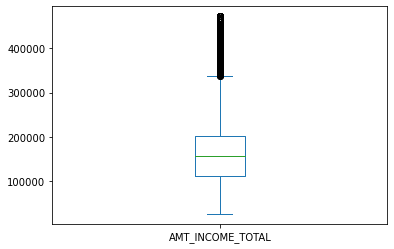

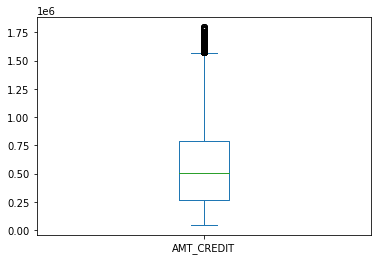

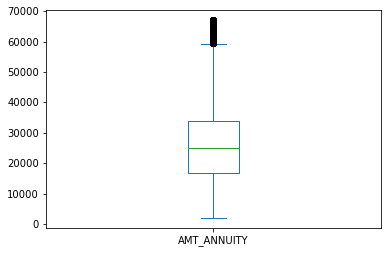

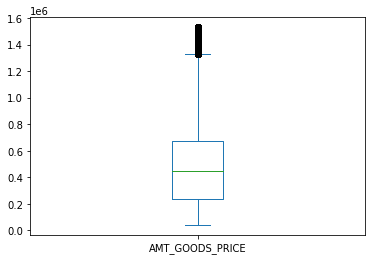

In [341]:
app_data.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()
for i in range(1,len(Set_1)):
    app_data[Set_1[i]].plot(kind='box')
    plt.show()

### Bivariate Analysis (Set_1)

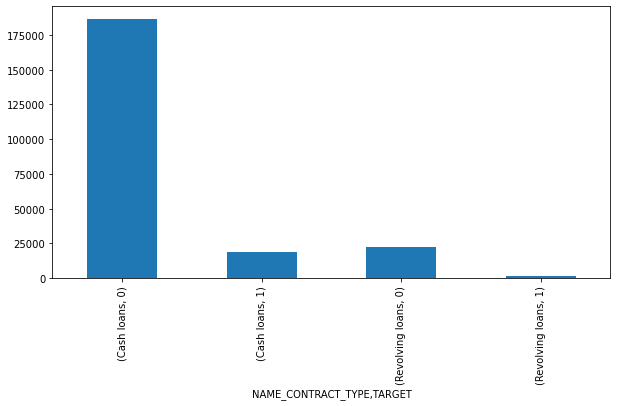

<Figure size 720x360 with 0 Axes>

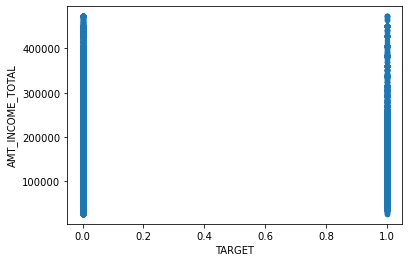

<Figure size 720x360 with 0 Axes>

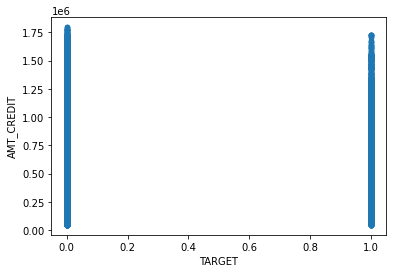

<Figure size 720x360 with 0 Axes>

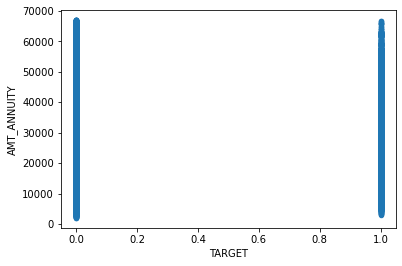

<Figure size 720x360 with 0 Axes>

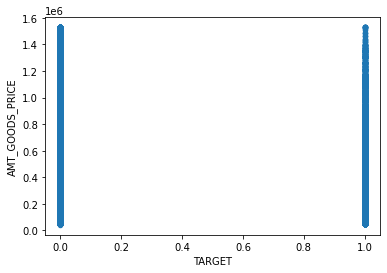

In [182]:
for i in range(len(Set_1)):
    if app_data[Set_1[i]].dtype == object:
        plt.figure(figsize=(10,5))
        app_data.groupby([Set_1[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        app_data.plot.scatter(x='TARGET',y=Set_1[i])
        plt.show()

### Segmented Analysis (Set_1)

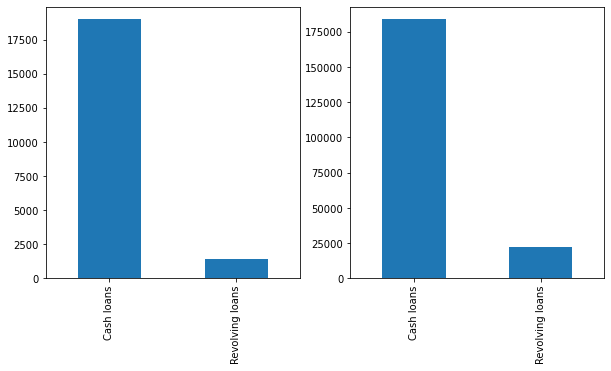

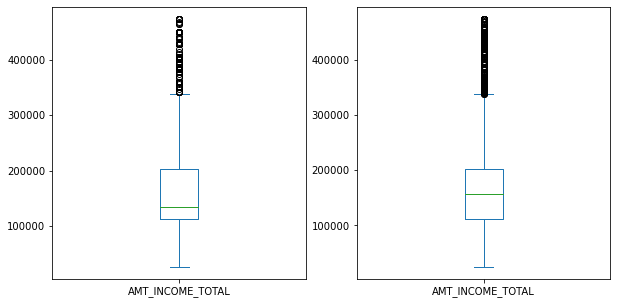

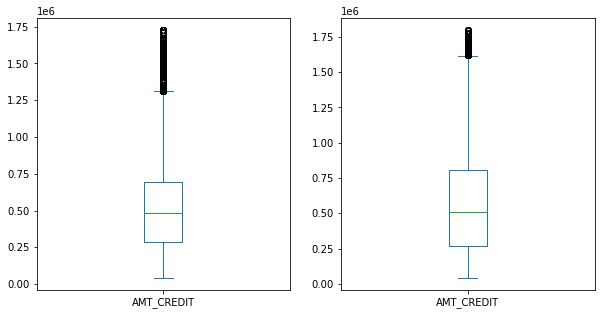

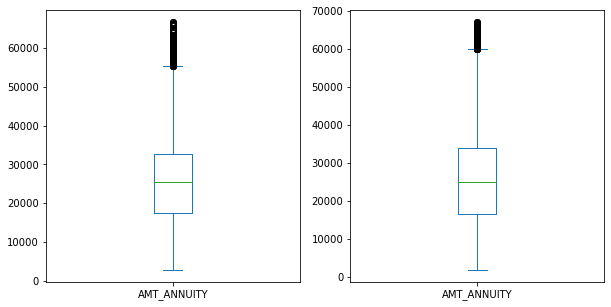

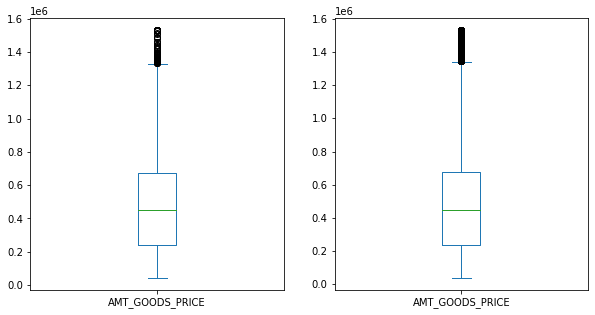

In [250]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_data_default.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.subplot(1,2,2)
app_data_nodef.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()
for i in range(1,len(Set_1)):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    app_data_default[Set_1[i]].plot(kind='box')
    plt.subplot(1,2,2)
    app_data_nodef[Set_1[i]].plot(kind='box')
    plt.show()

### Univariate Analysis (Set_2)

Chart Name : CODE_GENDER


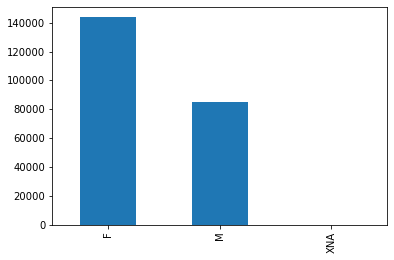

Chart Name : FLAG_OWN_CAR


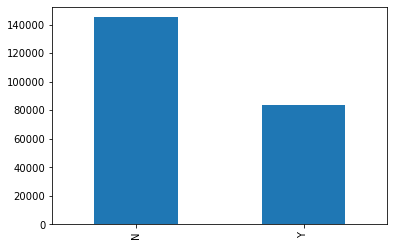

Chart Name : FLAG_OWN_REALTY


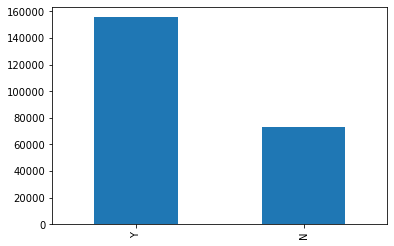

Chart Name : CNT_CHILDREN Mean : 0.4918041378948886    Median : 0.0    Mode : 0    0
Name: CNT_CHILDREN, dtype: int64


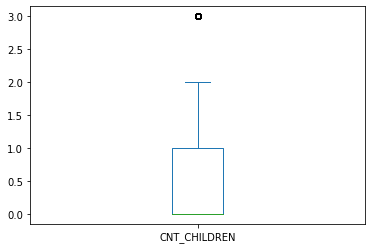

Chart Name : NAME_EDUCATION_TYPE


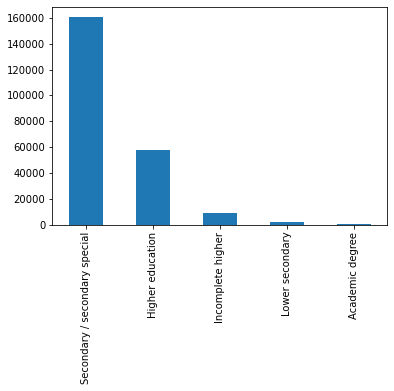

Chart Name : NAME_FAMILY_STATUS


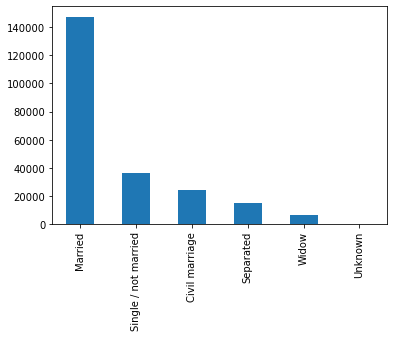

Chart Name : NAME_HOUSING_TYPE


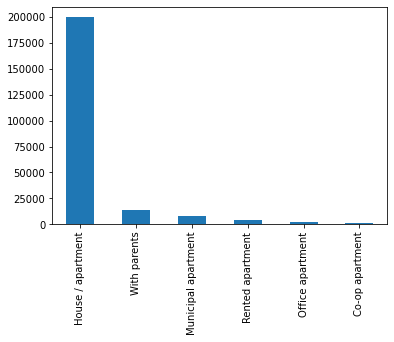

Chart Name : CNT_FAM_MEMBERS Mean : 2.242471227970562    Median : 2.0    Mode : 0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64


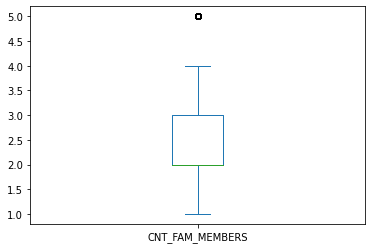

In [185]:
for i in range(len(Set_2)):
    if app_data[Set_2[i]].dtype==object:
        print("Chart Name :",Set_2[i])
        app_data[Set_2[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_2[i], "Mean :",app_data[Set_2[i]].mean(), "   Median :",app_data[Set_2[i]].median(),"   Mode :",app_data[Set_2[i]].mode())
        app_data[Set_2[i]].plot(kind='box')
        plt.show()


### Bivariate Analysis (Set_2)

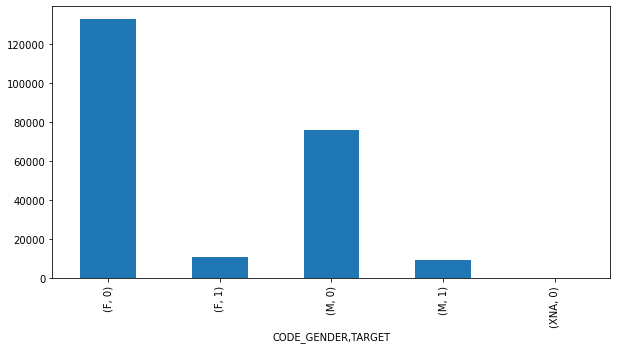

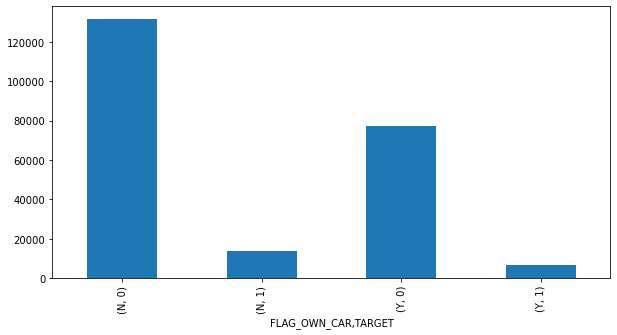

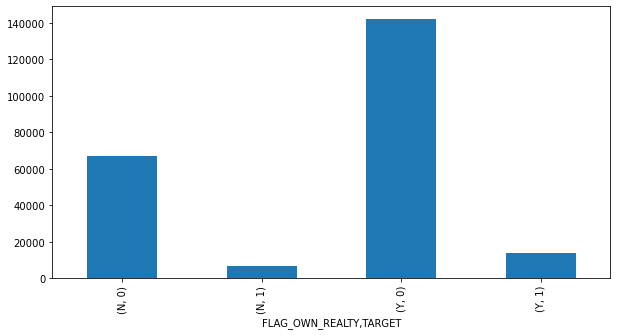

<Figure size 720x360 with 0 Axes>

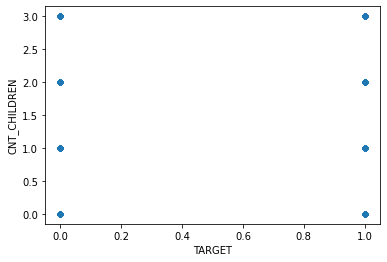

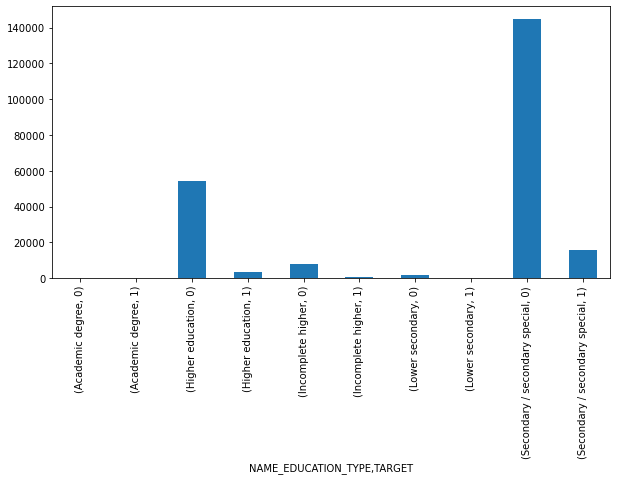

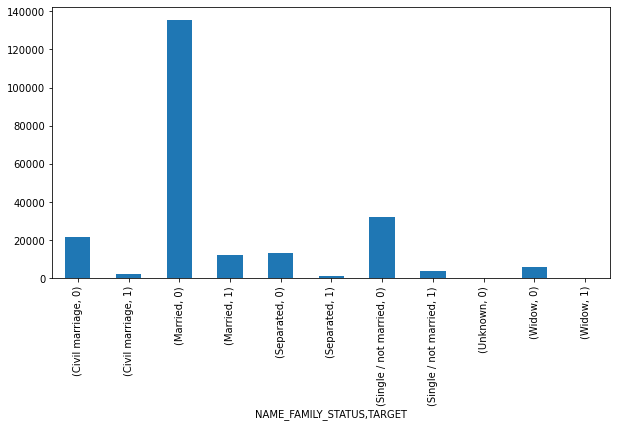

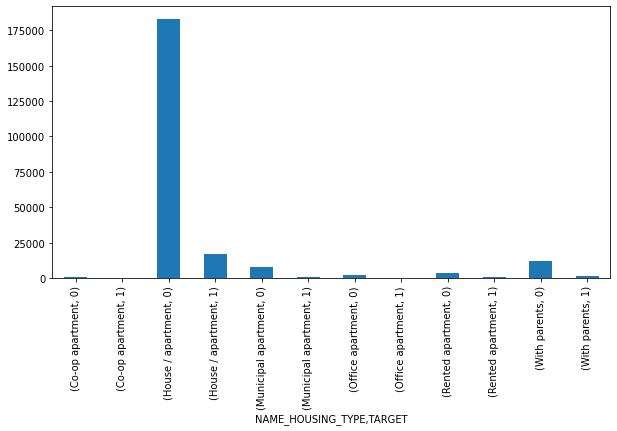

<Figure size 720x360 with 0 Axes>

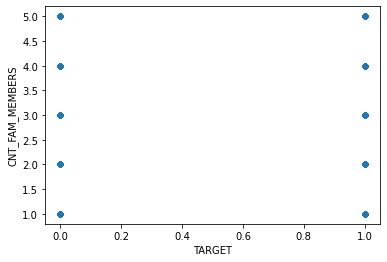

In [186]:
for i in range(len(Set_2)):
    if app_data[Set_2[i]].dtype == object:
        plt.figure(figsize=(10,5))
        app_data.groupby([Set_2[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        app_data.plot.scatter(x='TARGET',y=Set_2[i])
        plt.show()

### Segmented Analysis (Set_2)

FLAG_OWN_CAR


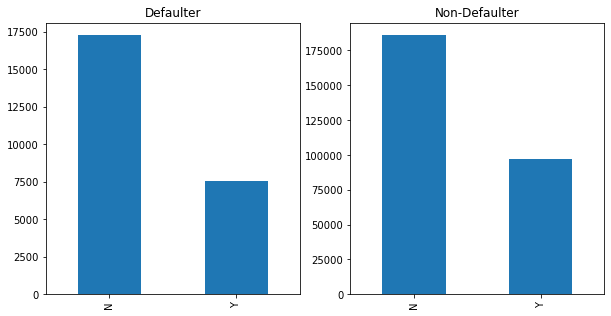

FLAG_OWN_REALTY


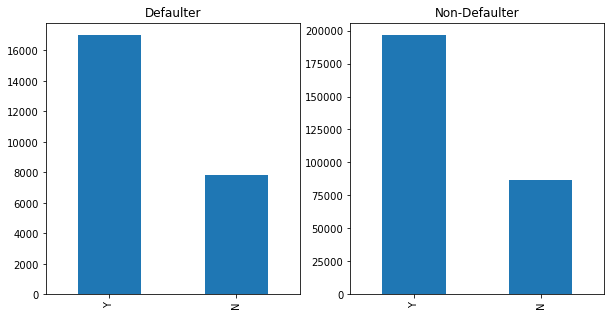

CNT_CHILDREN


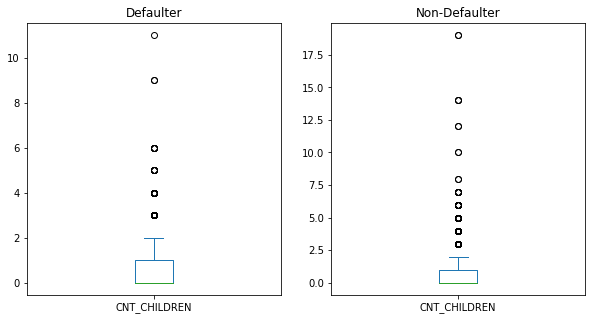

NAME_EDUCATION_TYPE


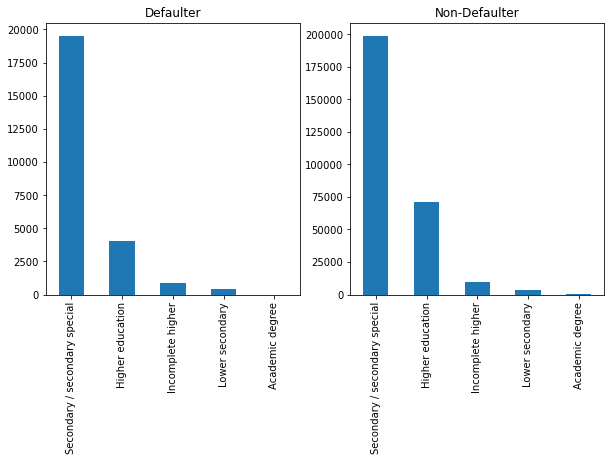

NAME_FAMILY_STATUS


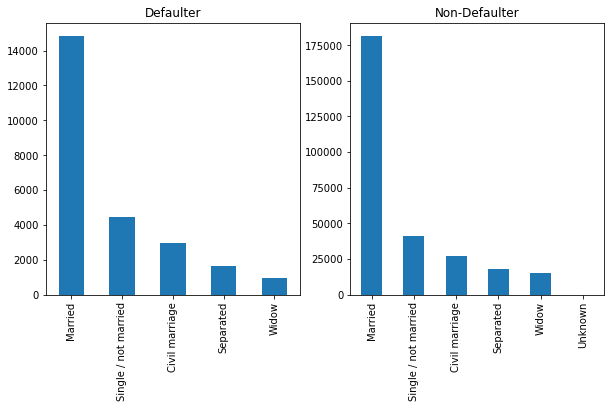

NAME_HOUSING_TYPE


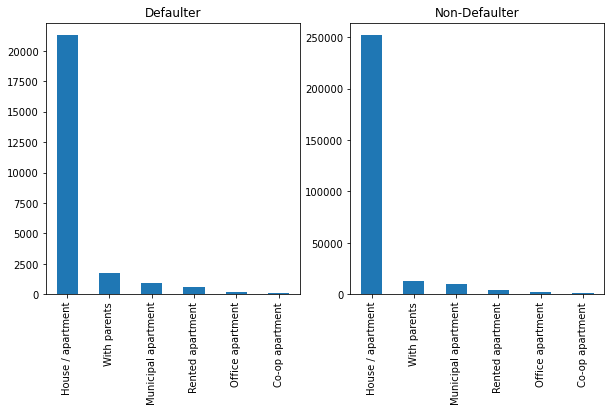

CNT_FAM_MEMBERS


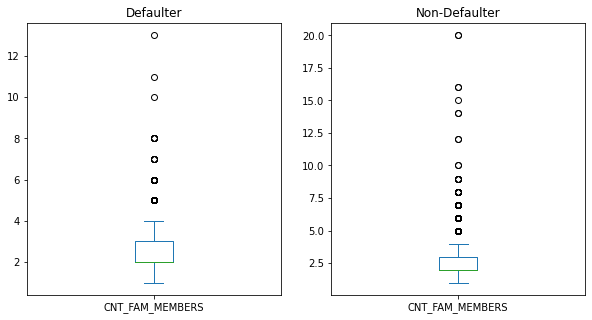

In [189]:
for i in range(1,len(Set_2)):
    if app_data[Set_2[i]].dtype==object:
        print(Set_2[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Defaulter')
        app_data_default[Set_2[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        plt.title('Non-Defaulter')
        app_data_nodef[Set_2[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_2[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Defaulter')
        app_data_default[Set_2[i]].plot(kind='box')
        plt.subplot(1,2,2)
        plt.title('Non-Defaulter')
        app_data_nodef[Set_2[i]].plot(kind='box')
        plt.show()

In [239]:
print(app_data_default.CNT_CHILDREN.median(),app_data_nodef.CNT_CHILDREN.median())


1.0 1.0


### Univariate Analysis (Set_3)

Chart Name : NAME_TYPE_SUITE


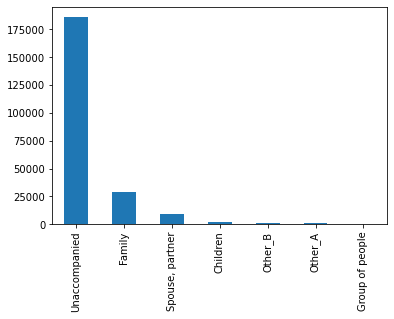

Chart Name : NAME_INCOME_TYPE


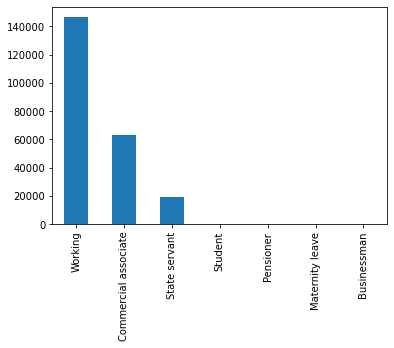

Chart Name : DAYS_BIRTH Mean : 14736.843822202422    Median : 14522.0    Mode : 0    13749
1    18248
Name: DAYS_BIRTH, dtype: int64


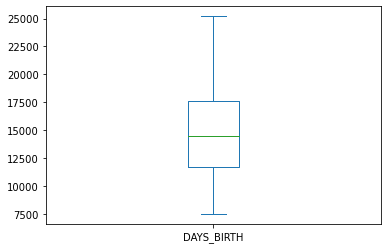

Chart Name : DAYS_EMPLOYED Mean : 2388.28866992492    Median : 1648.0    Mode : 0    200
Name: DAYS_EMPLOYED, dtype: int64


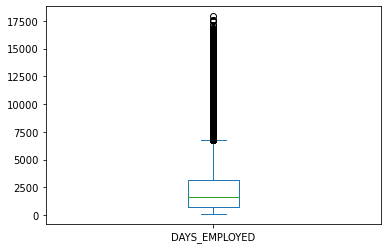

Chart Name : DAYS_REGISTRATION Mean : 4692.276794514544    Median : 4321.0    Mode : 0    490.0
Name: DAYS_REGISTRATION, dtype: float64


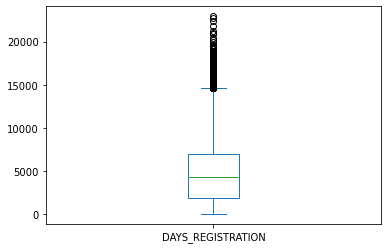

Chart Name : OCCUPATION_TYPE


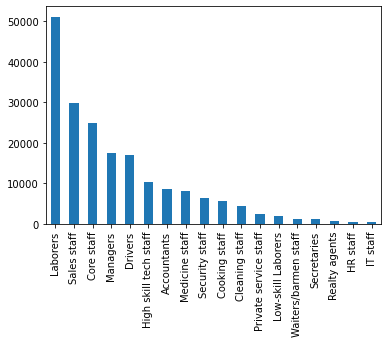

In [190]:
for i in range(len(Set_3)):
    if app_data[Set_3[i]].dtype==object:
        print("Chart Name :",Set_3[i])
        app_data[Set_3[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_3[i], "Mean :",app_data[Set_3[i]].mean(), "   Median :",app_data[Set_3[i]].median(),"   Mode :",app_data[Set_3[i]].mode())
        app_data[Set_3[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_3)

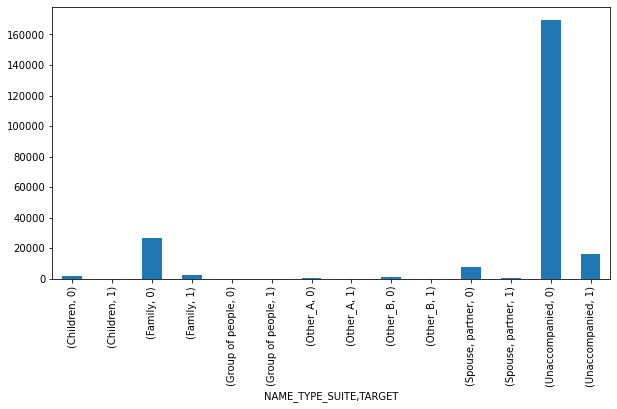

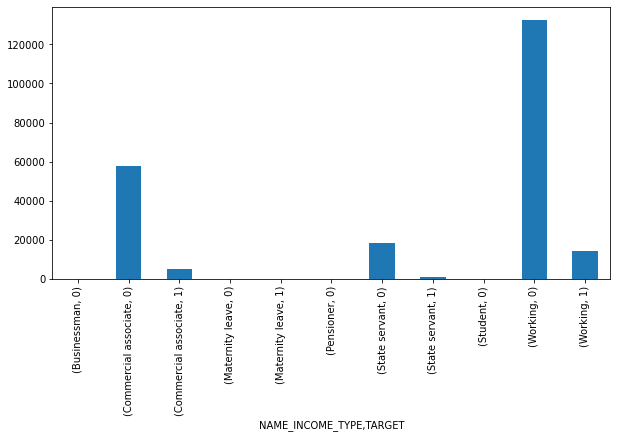

<Figure size 720x360 with 0 Axes>

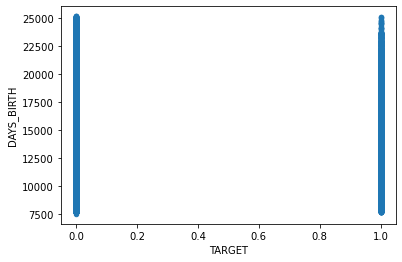

<Figure size 720x360 with 0 Axes>

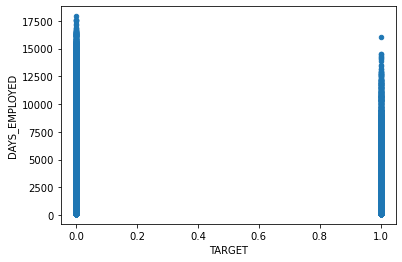

<Figure size 720x360 with 0 Axes>

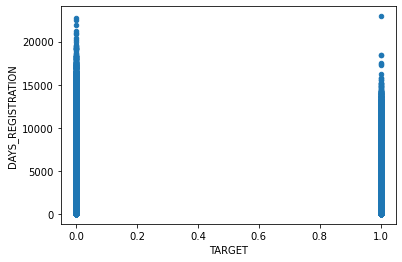

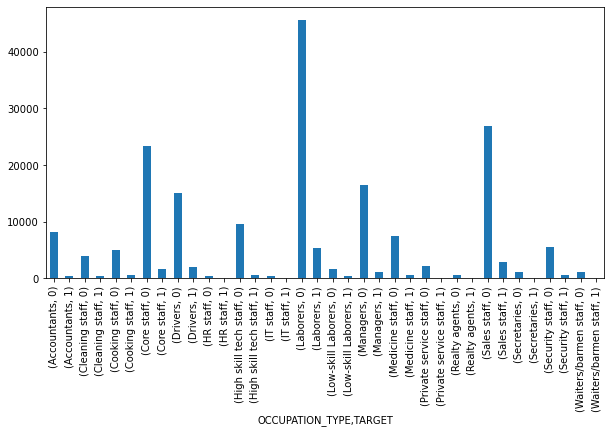

In [180]:
for i in range(len(Set_3)):
    if app_data[Set_3[i]].dtype == object:
        plt.figure(figsize=(10,5))
        app_data.groupby([Set_3[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        app_data.plot.scatter(x='TARGET',y=Set_3[i])
        plt.show()

### Segmented Analysis (Set_3)

NAME_INCOME_TYPE


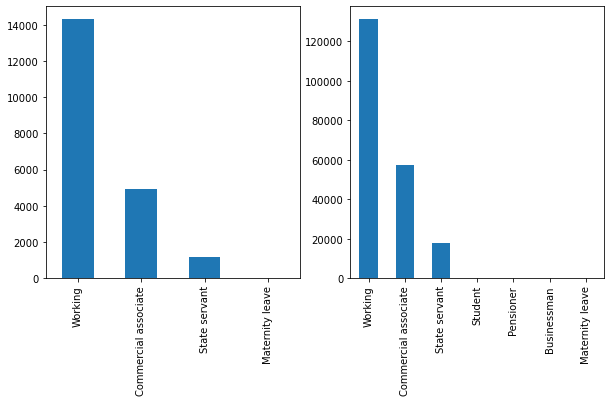

DAYS_BIRTH


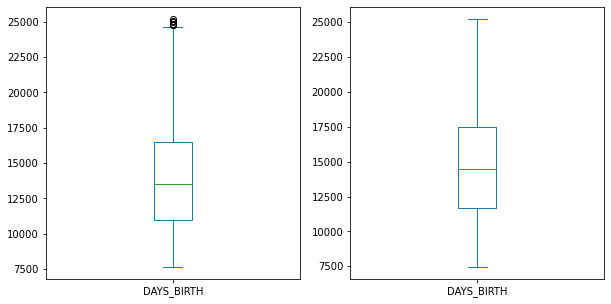

DAYS_EMPLOYED


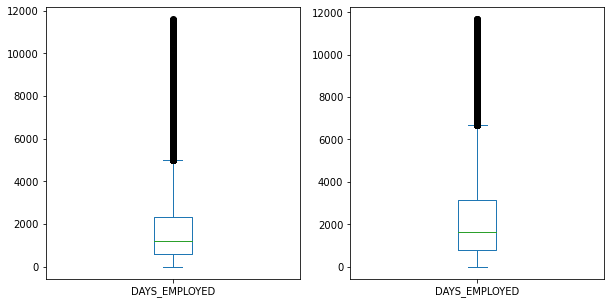

DAYS_REGISTRATION


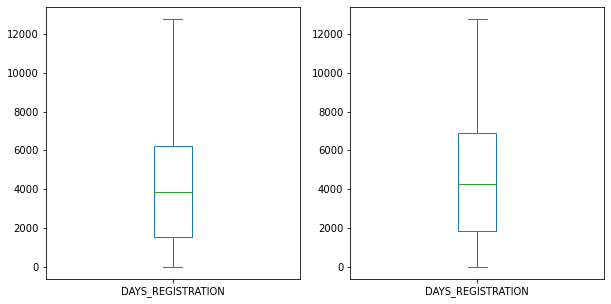

OCCUPATION_TYPE


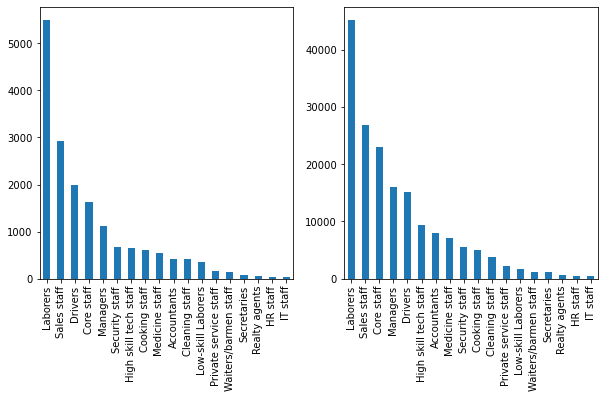

In [251]:
for i in range(1,len(Set_3)):
    if app_data[Set_3[i]].dtype==object:
        print(Set_3[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_3[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        app_data_nodef[Set_3[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_3[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_3[i]].plot(kind='box')
        plt.subplot(1,2,2)
        app_data_nodef[Set_3[i]].plot(kind='box')
        plt.show()

NAME_TYPE_SUITE


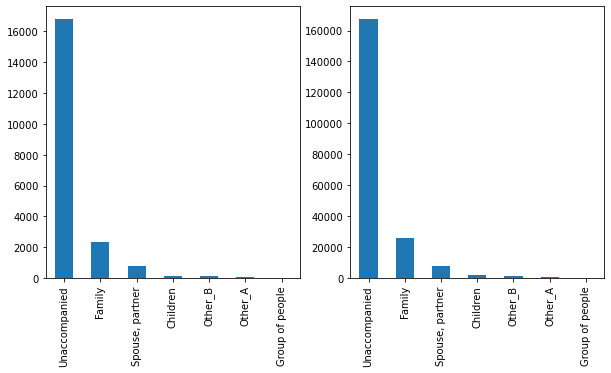

In [345]:
print(Set_3[0])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_data_default[Set_3[0]].value_counts().plot.bar()
plt.subplot(1,2,2)
app_data_nodef[Set_3[0]].value_counts().plot.bar()
plt.show()

### Univariate Analysis (Set_4)

Chart Name : DAYS_ID_PUBLISH Mean : 2822.926322409885    Median : 2903.0    Mode : 0    4214
Name: DAYS_ID_PUBLISH, dtype: int64


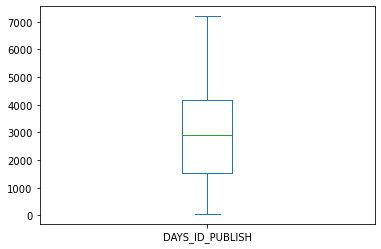

Chart Name : FLAG_MOBIL Mean : 0.9999956323676498    Median : 1.0    Mode : 0    1
Name: FLAG_MOBIL, dtype: int64


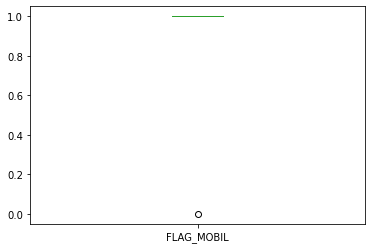

Chart Name : FLAG_CONT_MOBILE Mean : 0.9979341098983652    Median : 1.0    Mode : 0    1
Name: FLAG_CONT_MOBILE, dtype: int64


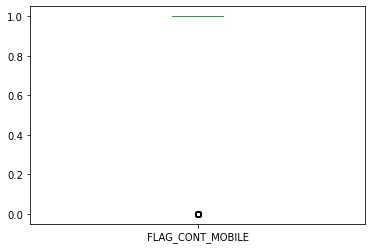

Chart Name : LIVE_CITY_NOT_WORK_CITY Mean : 0.22091047663971838    Median : 0.0    Mode : 0    0
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


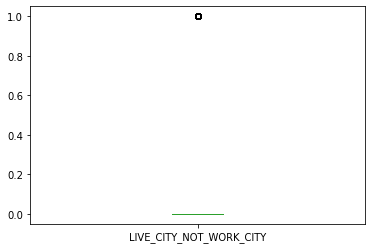

Chart Name : DAYS_LAST_PHONE_CHANGE Mean : 968.8702501790738    Median : 761.0    Mode : 0    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


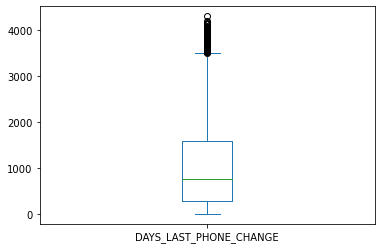

In [192]:
for i in range(len(Set_4)):
    if app_data[Set_4[i]].dtype==object:
        print("Chart Name :",Set_4[i])
        app_data[Set_4[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_4[i], "Mean :",app_data[Set_4[i]].mean(), "   Median :",app_data[Set_4[i]].median(),"   Mode :",app_data[Set_4[i]].mode())
        app_data[Set_4[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_4)

<Figure size 720x360 with 0 Axes>

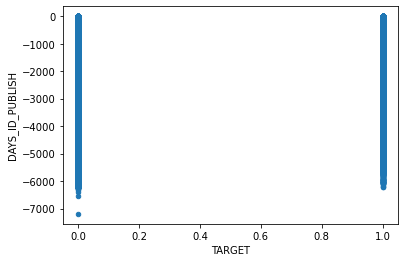

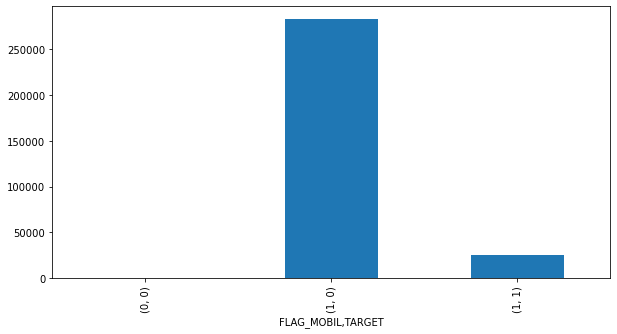

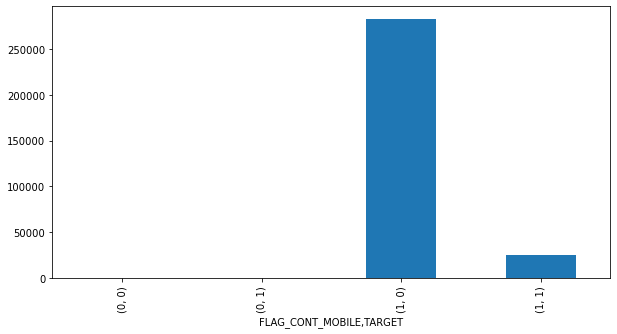

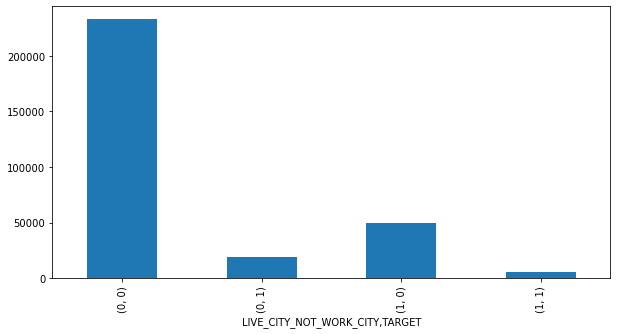

<Figure size 720x360 with 0 Axes>

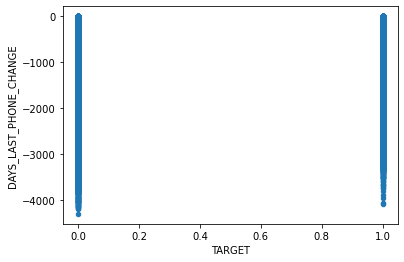

In [173]:
plt.figure(figsize=(10,5))
app_data.plot.scatter(x='TARGET',y='DAYS_ID_PUBLISH')
plt.show()
for i in range(1,len(Set_4)-1):
    plt.figure(figsize=(10,5))
    app_data.groupby([Set_4[i]])['TARGET'].value_counts().plot.bar()
    plt.show()

plt.figure(figsize=(10,5))
app_data.plot.scatter(x='TARGET',y='DAYS_LAST_PHONE_CHANGE')
plt.show()

### Segmented Analysis (Set_4)

FLAG_MOBIL


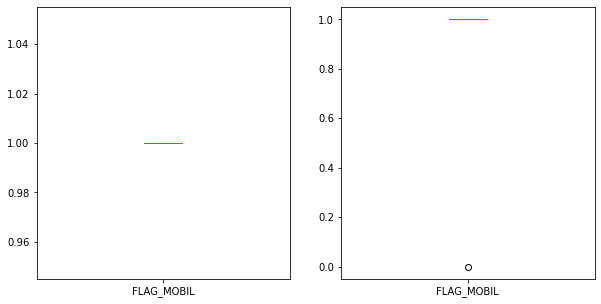

FLAG_CONT_MOBILE


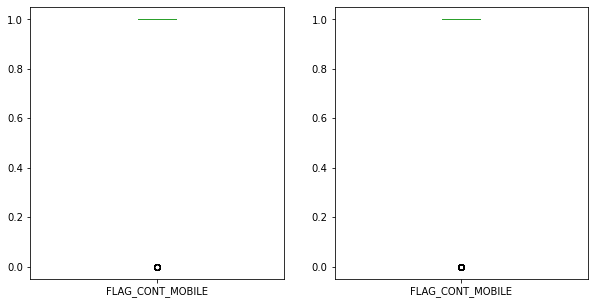

LIVE_CITY_NOT_WORK_CITY


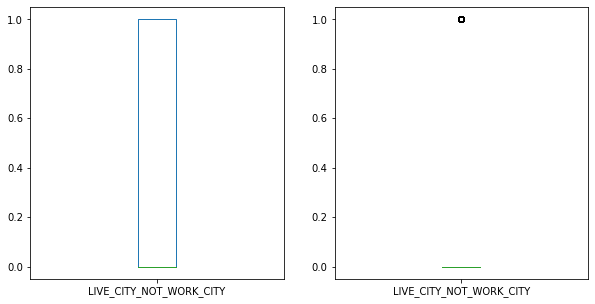

DAYS_LAST_PHONE_CHANGE


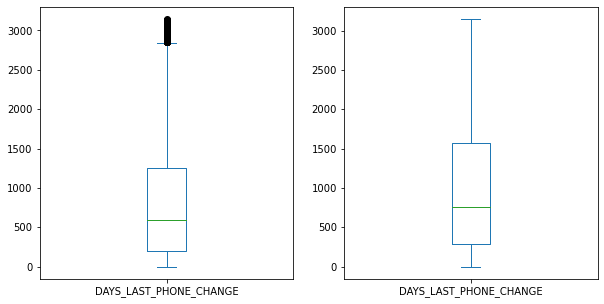

In [271]:
for i in range(1,len(Set_4)):
    if app_data[Set_4[i]].dtype==object:
        print(Set_4[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_4[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        app_data_nodef[Set_4[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_4[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_4[i]].plot(kind='box')
        plt.subplot(1,2,2)
        app_data_nodef[Set_4[i]].plot(kind='box')
        plt.show()

### Univariate Analysis (Set_5)

Chart Name : AMT_REQ_CREDIT_BUREAU_HOUR Mean : 0.00505563246679998    Median : 0.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


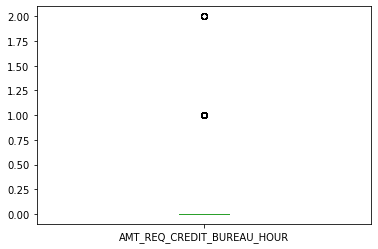

Chart Name : AMT_REQ_CREDIT_BUREAU_DAY Mean : 0.0    Median : 0.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


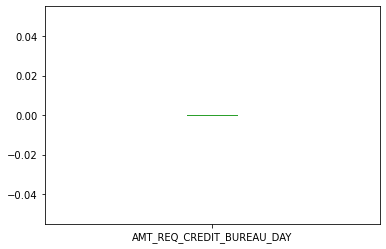

Chart Name : AMT_REQ_CREDIT_BUREAU_WEEK Mean : 0.0304260882941086    Median : 0.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


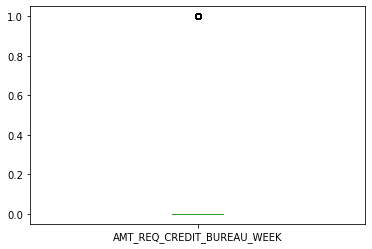

Chart Name : AMT_REQ_CREDIT_BUREAU_MON Mean : 0.2113213351792032    Median : 0.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


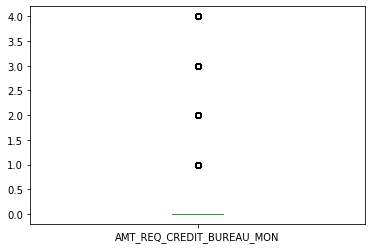

Chart Name : AMT_REQ_CREDIT_BUREAU_QRT Mean : 0.23240014356765626    Median : 0.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


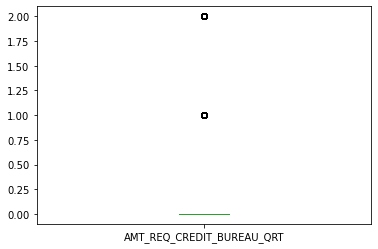

Chart Name : AMT_REQ_CREDIT_BUREAU_YEAR Mean : 1.831256729733887    Median : 1.0    Mode : 0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


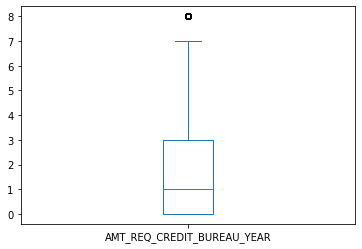

In [272]:
for i in range(len(Set_5)):
    if app_data[Set_5[i]].dtype==object:
        print("Chart Name :",Set_5[i])
        app_data[Set_5[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_5[i], "Mean :",app_data[Set_5[i]].mean(), "   Median :",app_data[Set_5[i]].median(),"   Mode :",app_data[Set_5[i]].mode())
        app_data[Set_5[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_5)

<Figure size 720x360 with 0 Axes>

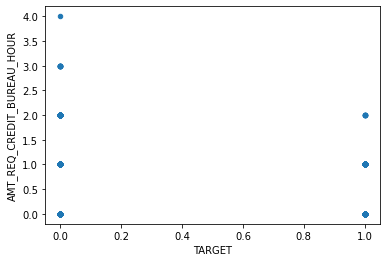

<Figure size 720x360 with 0 Axes>

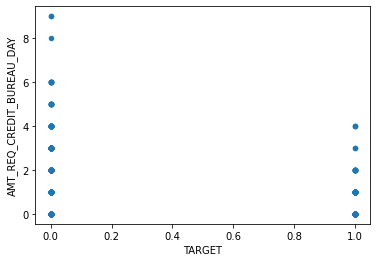

<Figure size 720x360 with 0 Axes>

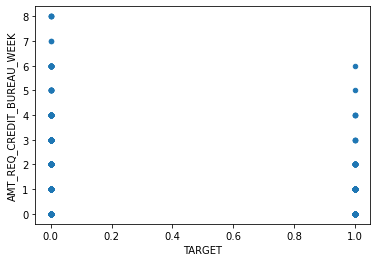

<Figure size 720x360 with 0 Axes>

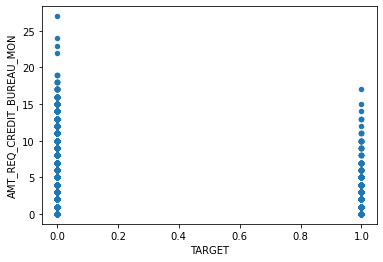

<Figure size 720x360 with 0 Axes>

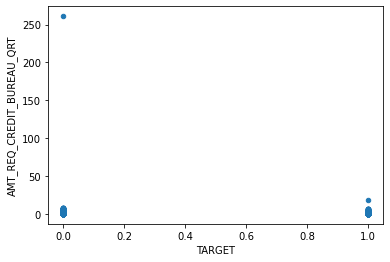

<Figure size 720x360 with 0 Axes>

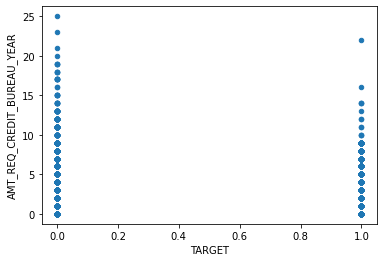

In [174]:
for i in range(len(Set_5)):
    if app_data[Set_5[i]].dtype == object:
        plt.figure(figsize=(10,5))
        app_data.groupby([Set_5[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        app_data.plot.scatter(x='TARGET',y=Set_5[i])
        plt.show()

### Segmented Analysis (Set_5)

AMT_REQ_CREDIT_BUREAU_DAY


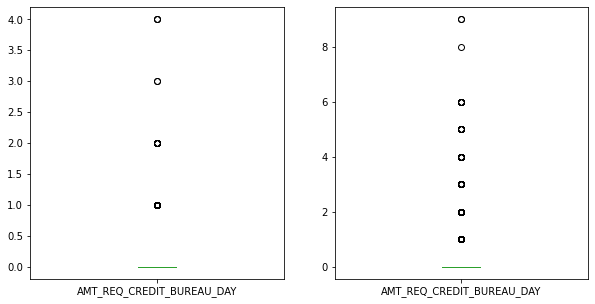

AMT_REQ_CREDIT_BUREAU_WEEK


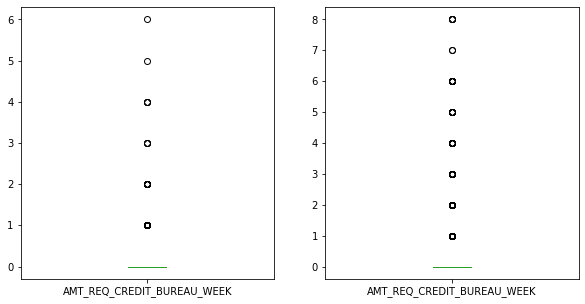

AMT_REQ_CREDIT_BUREAU_MON


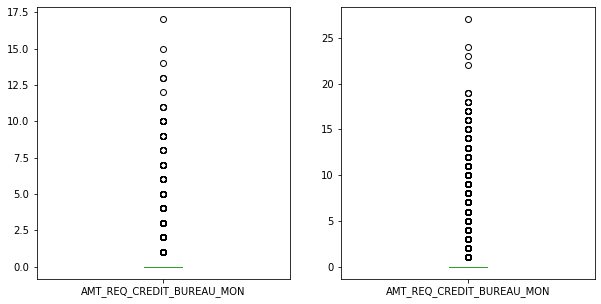

AMT_REQ_CREDIT_BUREAU_QRT


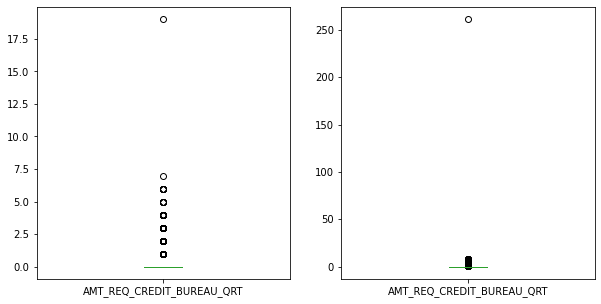

AMT_REQ_CREDIT_BUREAU_YEAR


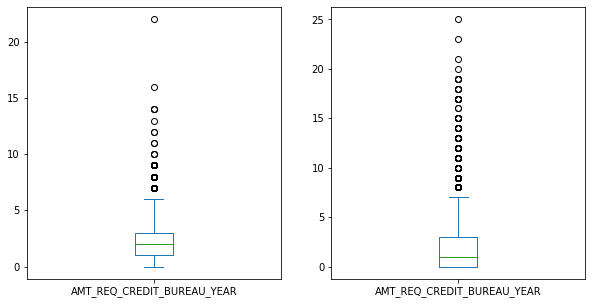

In [193]:
for i in range(1,len(Set_5)):
    if app_data[Set_5[i]].dtype==object:
        print(Set_5[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_5[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        app_data_nodef[Set_5[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_5[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        app_data_default[Set_5[i]].plot(kind='box')
        plt.subplot(1,2,2)
        app_data_nodef[Set_5[i]].plot(kind='box')
        plt.show()

# DATA CLEANING (Previous Application)

In [18]:
pd.set_option('display.max_rows',None)
prev_app.isnull().sum()#Geting coulmns with null value

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     38332
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               471342
AMT_GOODS_PRICE                 51657
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              839136
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA               373909
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    180431
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [22]:
#Droping unnecessary column with high no of null value and which are not imp for analysis
prev_app.drop(prev_app.loc[:,'RATE_INTEREST_PRIMARY':'RATE_INTEREST_PRIVILEGED'].columns,axis=1,inplace=True)
prev_app.drop(prev_app.loc[:,'WEEKDAY_APPR_PROCESS_START':'HOUR_APPR_PROCESS_START'].columns,axis=1,inplace=True)
prev_app.drop(prev_app.loc[:,'DAYS_FIRST_DRAWING':'NFLAG_INSURED_ON_APPROVAL'].columns,axis=1,inplace=True)

# Imputing the null values of columb NAME_TYPE_SUITE to
# Unaccompained as it has the higest % in overall data, also its the most logical group to fill the null in this case.

prev_app.NAME_TYPE_SUITE.fillna("Unaccompanied",inplace=True)

# Converting -ve column to absolute
prev_app.DAYS_DECISION= prev_app.DAYS_DECISION.abs()

#Imputing invalid values
prev_app.loc[prev_app.RATE_DOWN_PAYMENT==0,'RATE_DOWN_PAYMENT']=np.nan
prev_app.loc[prev_app.SELLERPLACE_AREA== -1,'SELLERPLACE_AREA']=np.nan
prev_app.loc[prev_app.CNT_PAYMENT==0,'CNT_PAYMENT']=np.nan

In [16]:
# Droping 15% of data as the crucial info is missing here
prev_app.drop(prev_app[prev_app.AMT_ANNUITY.isnull()
         &prev_app.AMT_DOWN_PAYMENT.isnull()
         &prev_app.AMT_GOODS_PRICE.isnull()
        &(prev_app['AMT_APPLICATION']==0)
        &(prev_app['AMT_CREDIT']==0)].index,inplace=True)

#### Segmenting Data on basis of NAME_CONTRACT_STATUS

In [56]:
prev_app_approved=prev_app[prev_app.NAME_CONTRACT_STATUS=='Approved' ]
prev_app_refused=prev_app[prev_app.NAME_CONTRACT_STATUS=='Refused' ]
prev_app_unused=prev_app[prev_app.NAME_CONTRACT_STATUS=='Unused offer' ]
prev_app_cancelled=prev_app[prev_app.NAME_CONTRACT_STATUS=='Canceled']

#### Creating Sets

In [14]:
Set_1_p=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE"]
Set_2_p=["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE"]
Set_3_p=["NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY"]
Set_4_p=["DAYS_DECISION","CHANNEL_TYPE","CNT_PAYMENT","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

### Outlier Check

In [34]:
# Outlier check
print('Set_1_p')
for i in range(len(Set_1_p)):
    if prev_app[Set_1_p[i]].dtype != object:
        print(prev_app[Set_1_p[i]].quantile([.5,.7,.9,.95,.99,1]))

for i in range(len(Set_2_p)):
    if prev_app[Set_2_p[i]].dtype != object:
        print(prev_app[Set_2_p[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_3_p')
for i in range(len(Set_3_p)):
    if prev_app[Set_3_p[i]].dtype != object:
        print(prev_app[Set_3_p[i]].quantile([.5,.7,.9,.99,1]))
print("\n",'Set_4_p')
for i in range(len(Set_4_p)):
    if prev_app[Set_4_p[i]].dtype != object:
        print(prev_app[Set_4_p[i]].quantile([.5,.7,.9,.99,1]))

Set_1_p
0.50    10261.9125
0.70    15337.4850
0.90    25995.7260
0.95    31680.0000
0.99    45000.0000
1.00    53303.4000
Name: AMT_ANNUITY, dtype: float64
0.50     90000.0
0.70    157500.0
0.90    360000.0
0.95    450000.0
0.99    675000.0
1.00    679500.0
Name: AMT_APPLICATION, dtype: float64
0.50    102793.5
0.70    180000.0
0.90    442422.0
0.95    534721.5
0.99    760225.5
1.00    900000.0
Name: AMT_CREDIT, dtype: float64
0.50     1260.00
0.70     5634.00
0.90    14917.50
0.95    22500.00
0.99    39050.37
1.00    45000.00
Name: AMT_DOWN_PAYMENT, dtype: float64
0.50     94905.0
0.70    162000.0
0.90    364500.0
0.95    454500.0
0.99    675000.0
1.00    765000.0
Name: AMT_GOODS_PRICE, dtype: float64

 Set_3_p
0.50      70.0
0.70     200.0
0.90    1657.0
0.99    3540.0
1.00    4596.0
Name: SELLERPLACE_AREA, dtype: float64

 Set_4_p
0.50     840.0
0.70    1441.0
0.90    2424.0
0.99    2857.0
1.00    2922.0
Name: DAYS_DECISION, dtype: float64
0.50    12.0
0.70    18.0
0.90    36.0
0.99

In [33]:
# Droping Outliers as they are hindering with visulisation and anlysis.
prev_app.drop(prev_app[prev_app.AMT_ANNUITY>prev_app.AMT_ANNUITY.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.AMT_APPLICATION>prev_app.AMT_APPLICATION.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.AMT_CREDIT>prev_app.AMT_CREDIT.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.AMT_DOWN_PAYMENT>prev_app.AMT_DOWN_PAYMENT.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.AMT_GOODS_PRICE>prev_app.AMT_GOODS_PRICE.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.SELLERPLACE_AREA>prev_app.SELLERPLACE_AREA.quantile(.99)].index,inplace=True)
prev_app.drop(prev_app[prev_app.CNT_PAYMENT>prev_app.CNT_PAYMENT.quantile(.99)].index,inplace=True)


### Univariate Analysis (Set_1_p)

Chart Name : AMT_ANNUITY Mean : 12863.70991020252    Median : 10261.912499999999    Mode : 0    2250.0
Name: AMT_ANNUITY, dtype: float64


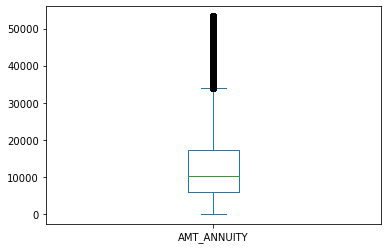

Chart Name : AMT_APPLICATION Mean : 143262.5253867407    Median : 90000.0    Mode : 0    0.0
Name: AMT_APPLICATION, dtype: float64


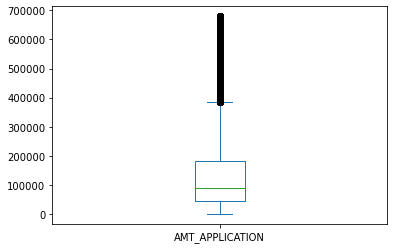

Chart Name : AMT_CREDIT Mean : 165353.9820619111    Median : 102793.5    Mode : 0    45000.0
Name: AMT_CREDIT, dtype: float64


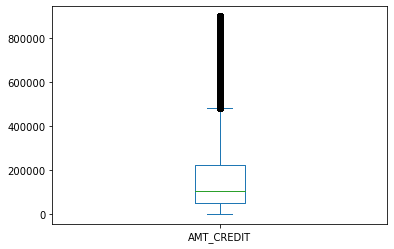

Chart Name : AMT_DOWN_PAYMENT Mean : 5081.771874565843    Median : 1260.0    Mode : 0    0.0
Name: AMT_DOWN_PAYMENT, dtype: float64


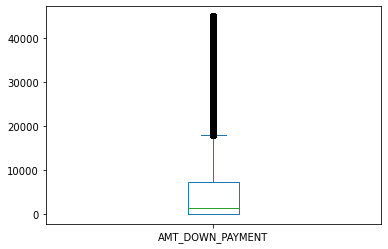

Chart Name : AMT_GOODS_PRICE Mean : 149663.03987498992    Median : 94905.0    Mode : 0    45000.0
Name: AMT_GOODS_PRICE, dtype: float64


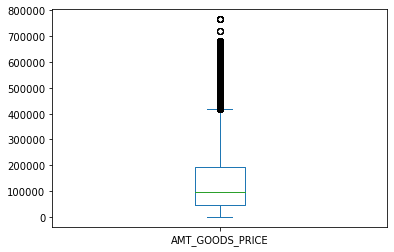

In [36]:
for i in range(len(Set_1_p)):
    if prev_app[Set_1_p[i]].dtype==object:
        print("Chart Name :",Set_1_p[i])
        prev_app[Set_1_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_1_p[i], "Mean :",prev_app[Set_1_p[i]].mean(), "   Median :",prev_app[Set_1_p[i]].median(),"   Mode :",prev_app[Set_1_p[i]].mode())
        prev_app[Set_1_p[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_1_p)

<Figure size 720x360 with 0 Axes>

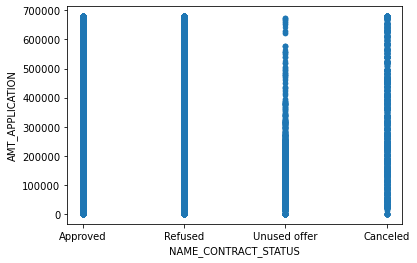

<Figure size 720x360 with 0 Axes>

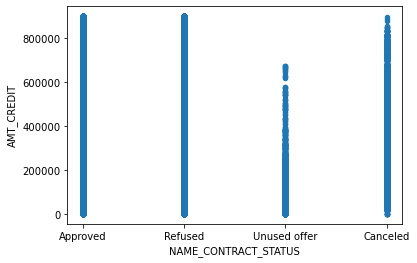

<Figure size 720x360 with 0 Axes>

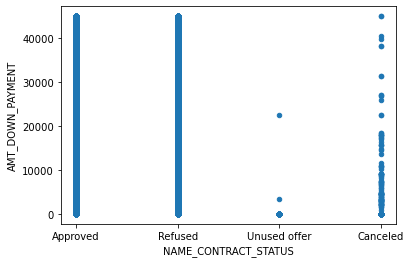

<Figure size 720x360 with 0 Axes>

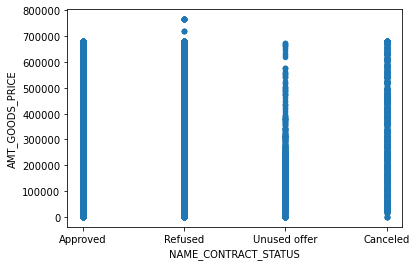

In [51]:
for i in range(1,len(Set_1_p)):
    plt.figure(figsize=(10,5))
    prev_app.plot.scatter(x='NAME_CONTRACT_STATUS',y=Set_1_p[i])
    plt.show()

### Segmented Univariate Analysis (Set_1_p)

AMT_APPLICATION


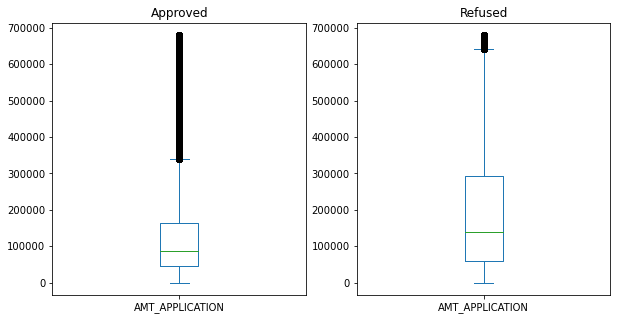

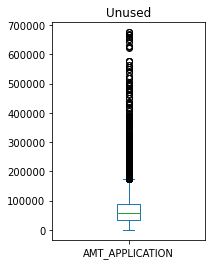

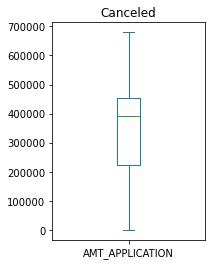

AMT_CREDIT


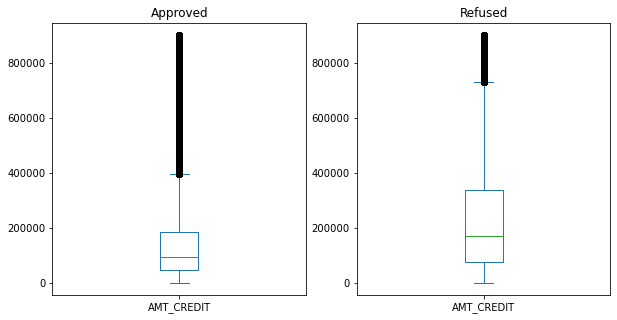

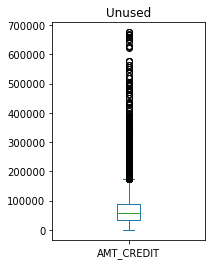

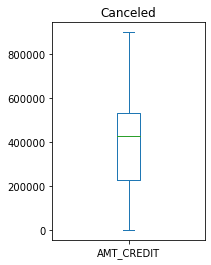

AMT_DOWN_PAYMENT


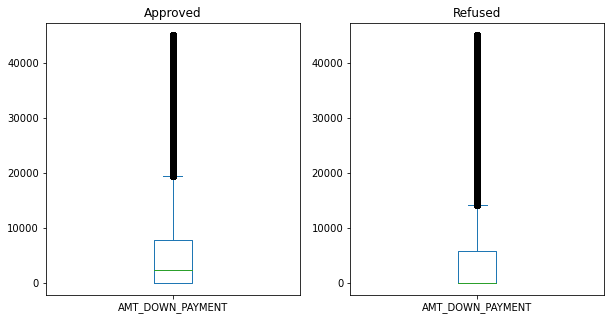

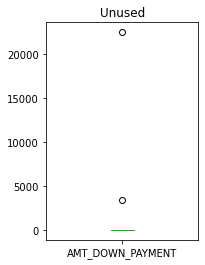

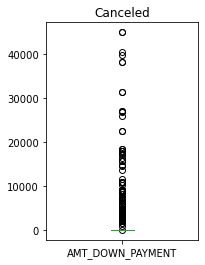

AMT_GOODS_PRICE


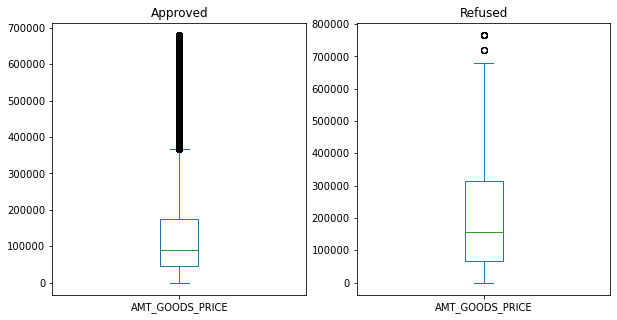

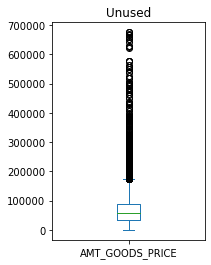

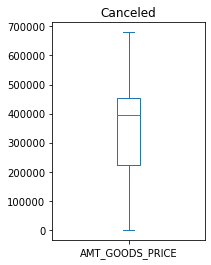

In [71]:
for i in range(1,len(Set_1_p)):
    if prev_app[Set_1_p[i]].dtype==object:
        print(Set_1_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_1_p[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_1_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(2,2,1)
        plt.title('Unused')
        prev_app_unused[Set_1_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(2,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_1_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_1_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_1_p[i]].plot(kind='box')
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_1_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,1)
        plt.title('Unused')
        prev_app_unused[Set_1_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_1_p[i]].plot(kind='box')
        plt.show()

### Univariate Analysis (Set_2_p)

Chart Name : NAME_CASH_LOAN_PURPOSE


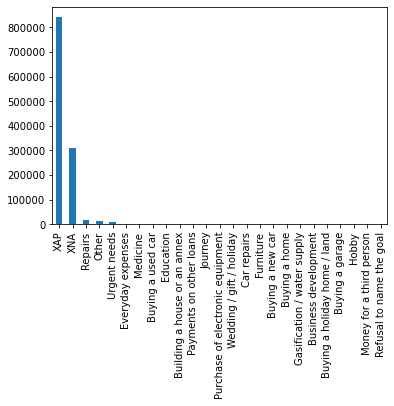

Chart Name : NAME_CONTRACT_STATUS


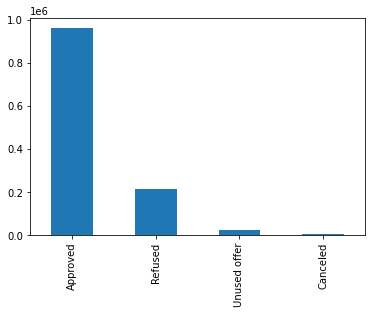

Chart Name : NAME_PAYMENT_TYPE


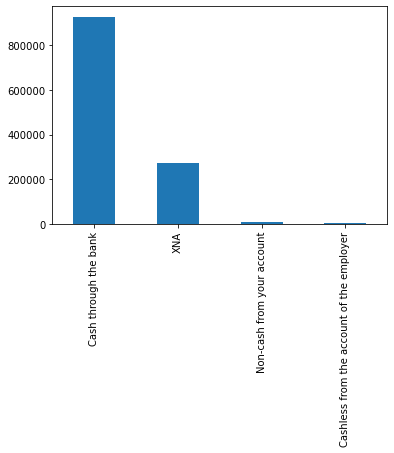

Chart Name : CODE_REJECT_REASON


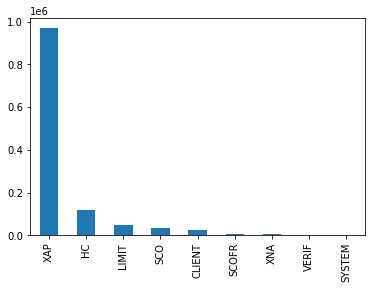

Chart Name : NAME_TYPE_SUITE


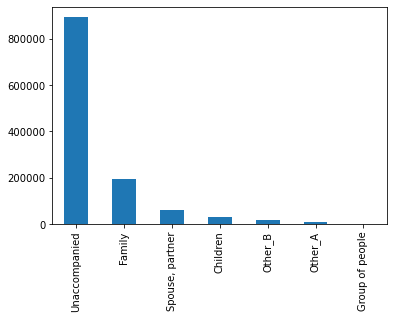

Chart Name : NAME_CLIENT_TYPE


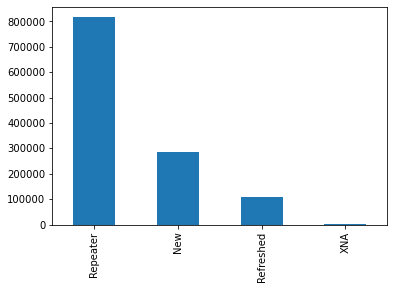

In [73]:
for i in range(len(Set_2_p)):
    if prev_app[Set_2_p[i]].dtype==object:
        print("Chart Name :",Set_2_p[i])
        prev_app[Set_2_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_2_p[i], "Mean :",prev_app[Set_2_p[i]].mean(), "   Median :",prev_app[Set_2_p[i]].median(),"   Mode :",prev_app[Set_2_p[i]].mode())
        prev_app[Set_2_p[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_2_p)

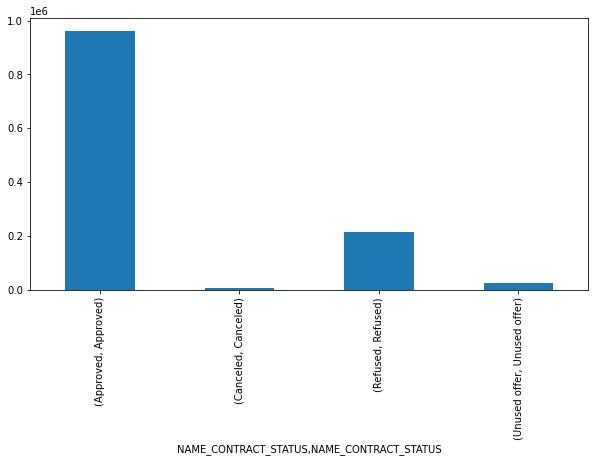

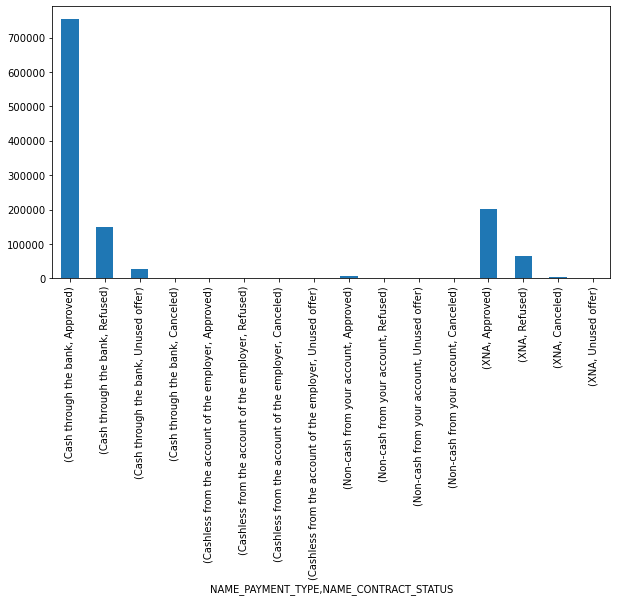

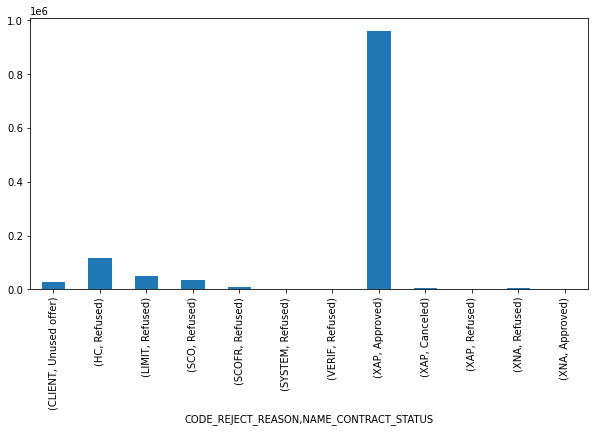

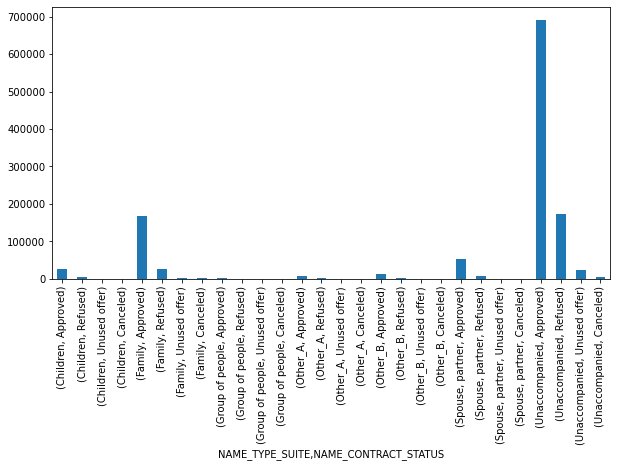

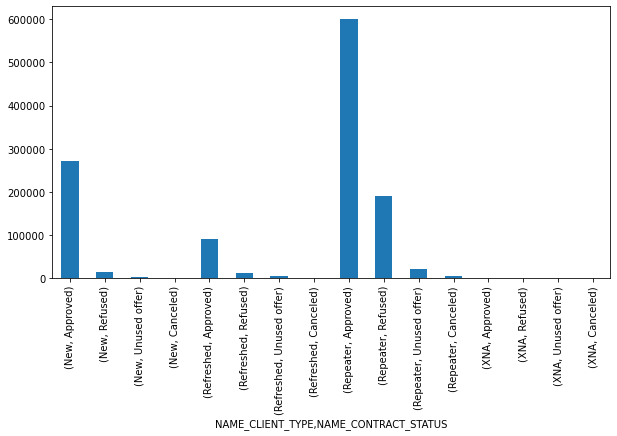

In [154]:
for i in range(1,len(Set_2_p)):
    if prev_app[Set_2_p[i]].dtype == object:
        plt.figure(figsize=(10,5))
        prev_app.groupby([Set_2_p[i]])['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        prev_app.plot.scatter(x='NAME_CONTRACT_STATUS',y=Set_2_p[i])
        plt.show()   

### Segmented Univariate Analysis (Set_2_p)

NAME_CONTRACT_STATUS


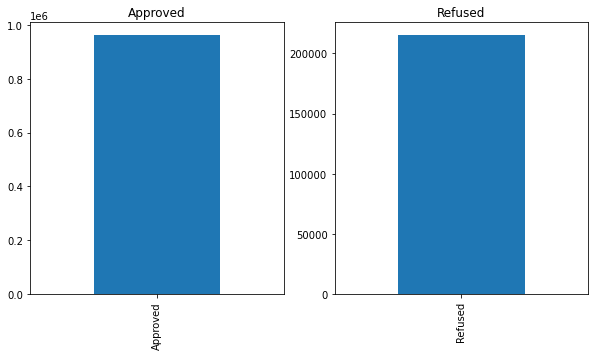

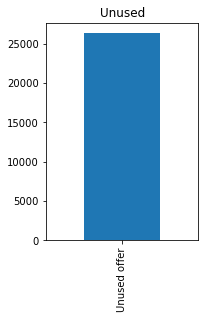

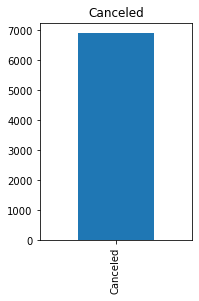

NAME_PAYMENT_TYPE


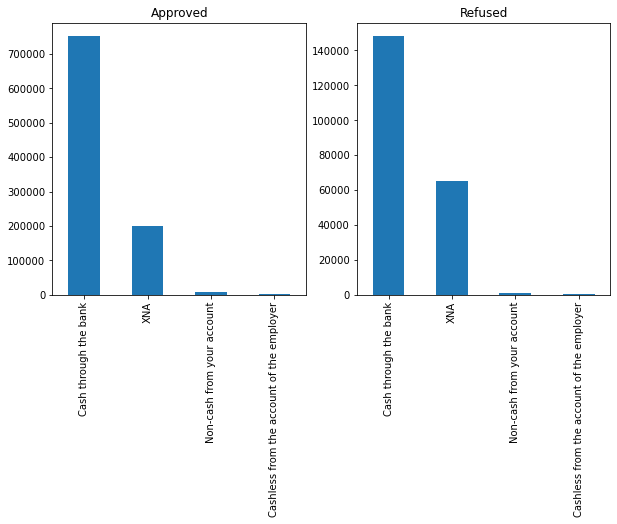

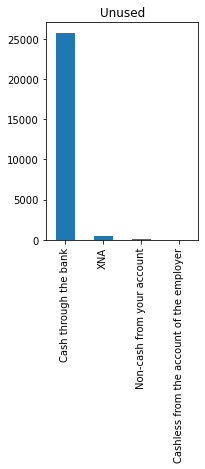

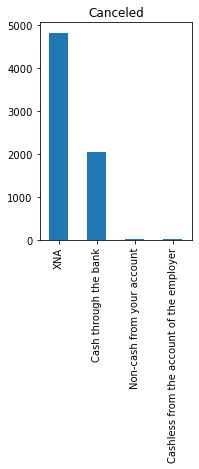

CODE_REJECT_REASON


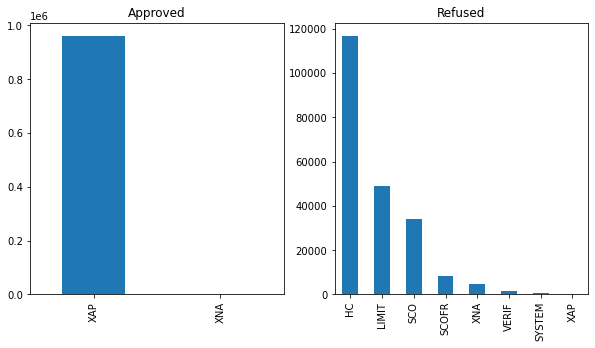

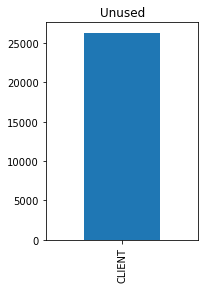

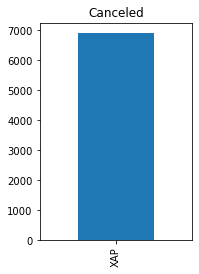

NAME_TYPE_SUITE


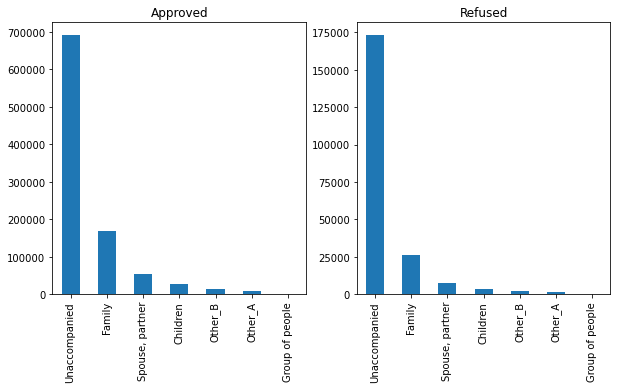

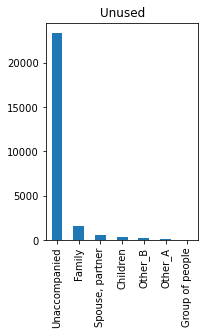

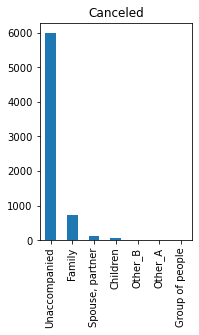

NAME_CLIENT_TYPE


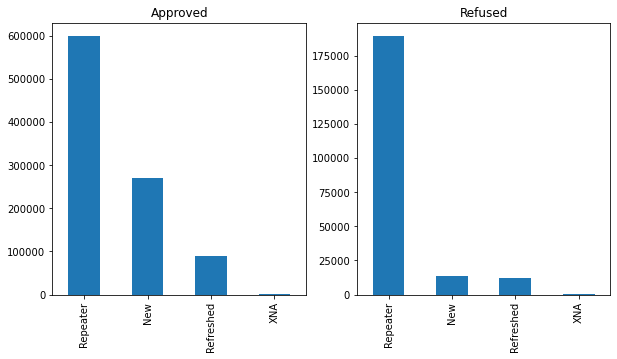

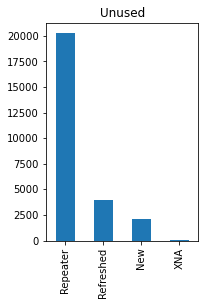

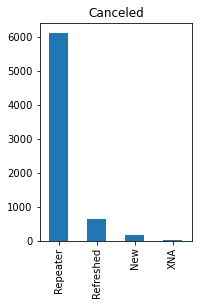

In [78]:
for i in range(1,len(Set_2_p)):
    if prev_app[Set_2_p[i]].dtype==object:
        print(Set_2_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_2_p[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_2_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_2_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_2_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_2_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_2_p[i]].plot(kind='box')
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_2_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_2_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_2_p[i]].plot(kind='box')
        plt.show()

### Univariate Analysis (Set_3_p)

Chart Name : NAME_CASH_LOAN_PURPOSE


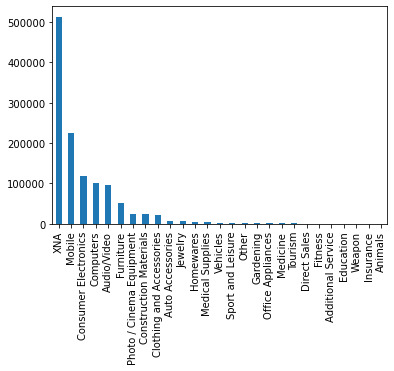

Chart Name : NAME_CONTRACT_STATUS


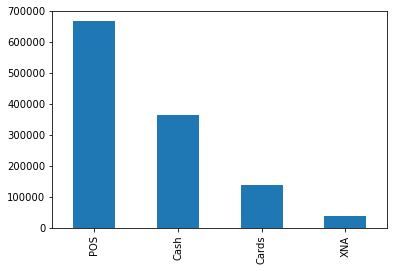

Chart Name : NAME_PAYMENT_TYPE


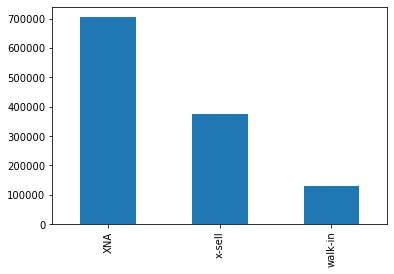

Chart Name : SELLERPLACE_AREA Mean : 448.378343014658    Median : 70.0    Mode : 0    0.0
Name: SELLERPLACE_AREA, dtype: float64


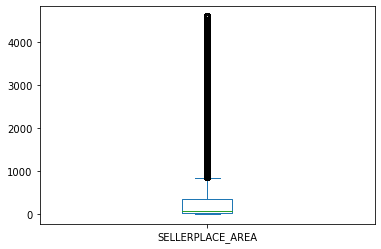

Chart Name : NAME_TYPE_SUITE


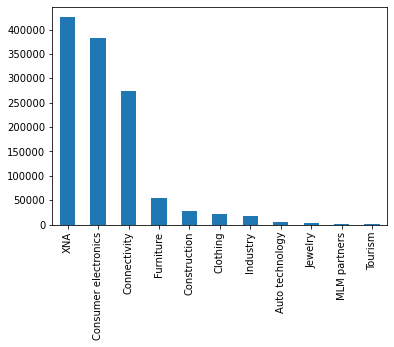

In [79]:
for i in range(len(Set_3_p)):
    if prev_app[Set_3_p[i]].dtype==object:
        print("Chart Name :",Set_2_p[i])
        prev_app[Set_3_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_3_p[i], "Mean :",prev_app[Set_3_p[i]].mean(), "   Median :",prev_app[Set_3_p[i]].median(),"   Mode :",prev_app[Set_3_p[i]].mode())
        prev_app[Set_3_p[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_3_p)

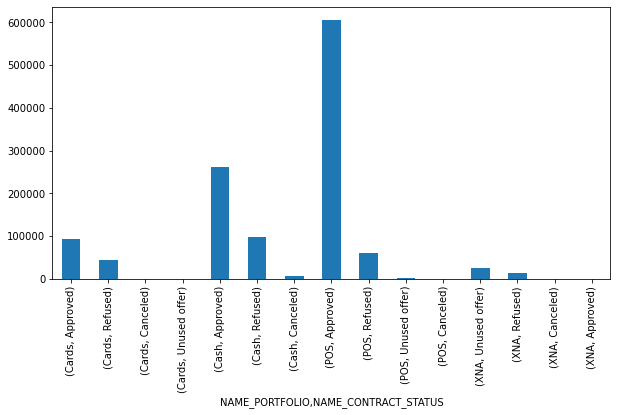

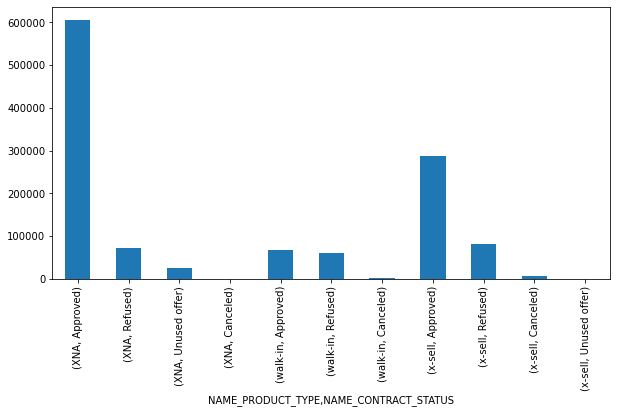

<Figure size 720x360 with 0 Axes>

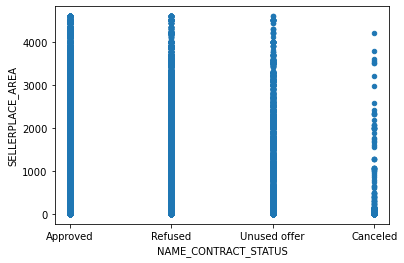

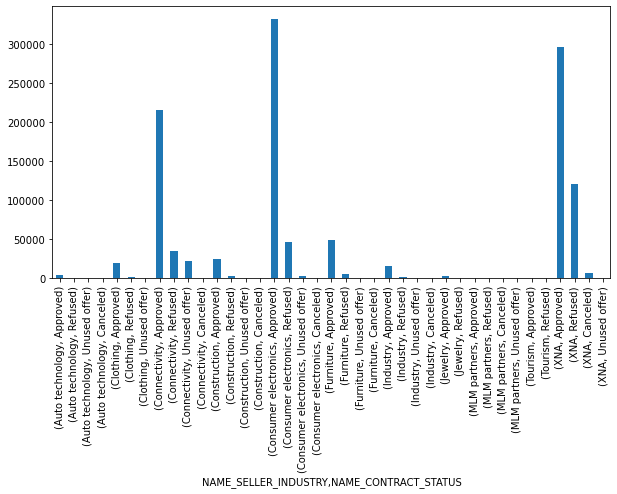

In [153]:
for i in range(1,len(Set_3_p)):
    if prev_app[Set_3_p[i]].dtype == object:
        plt.figure(figsize=(10,5))
        prev_app.groupby([Set_3_p[i]])['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        prev_app.plot.scatter(x='NAME_CONTRACT_STATUS',y=Set_3_p[i])
        plt.show()

### Segmented Univariate Analysis (Set_3_p)

NAME_PORTFOLIO


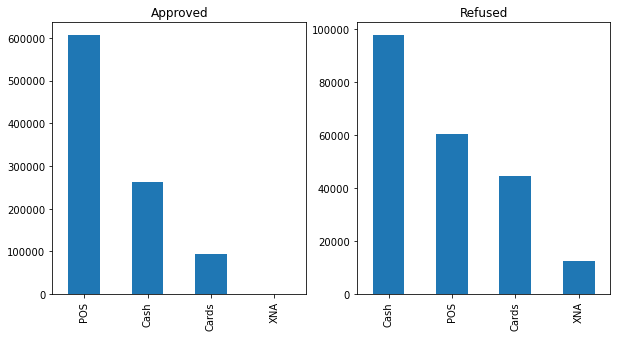

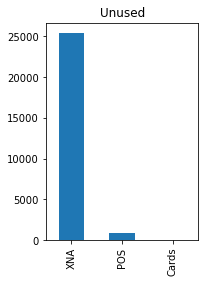

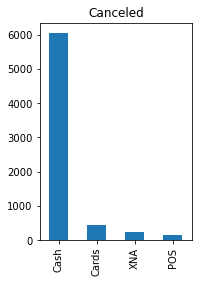

NAME_PRODUCT_TYPE


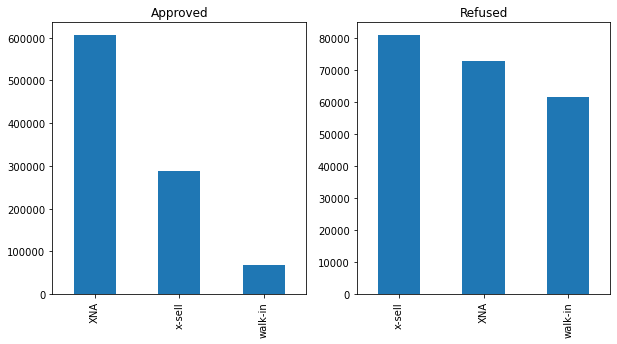

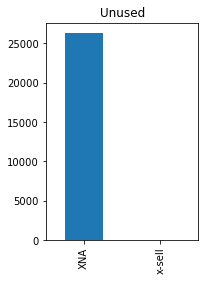

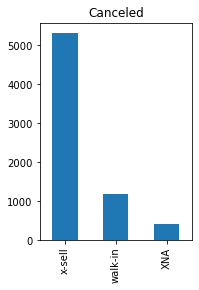

SELLERPLACE_AREA


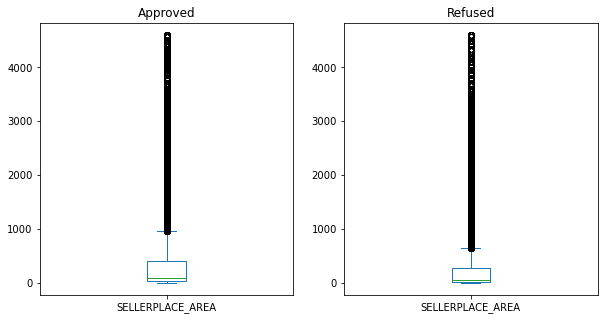

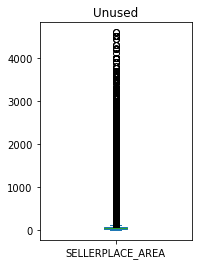

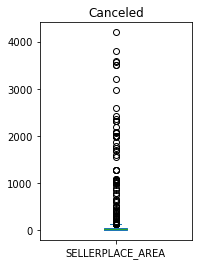

NAME_SELLER_INDUSTRY


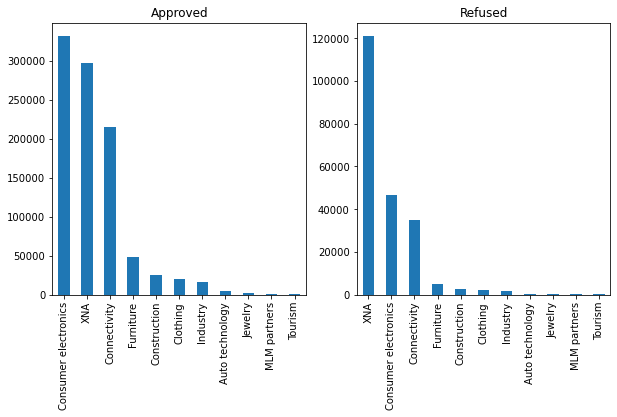

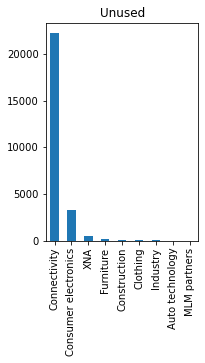

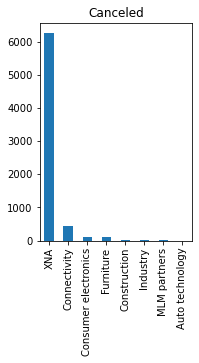

In [81]:
for i in range(1,len(Set_3_p)):
    if prev_app[Set_3_p[i]].dtype==object:
        print(Set_3_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_3_p[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_3_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_3_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_3_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_3_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_3_p[i]].plot(kind='box')
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_3_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_3_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_3_p[i]].plot(kind='box')
        plt.show()

### Univariate Analysis (Set_4_p)

Chart Name : DAYS_DECISION Mean : 1084.90357607637    Median : 840.0    Mode : 0    364
Name: DAYS_DECISION, dtype: int64


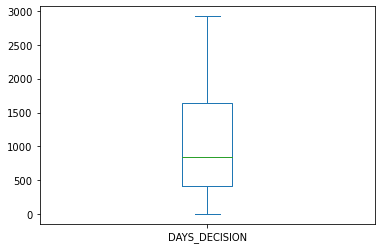

Chart Name : CHANNEL_TYPE


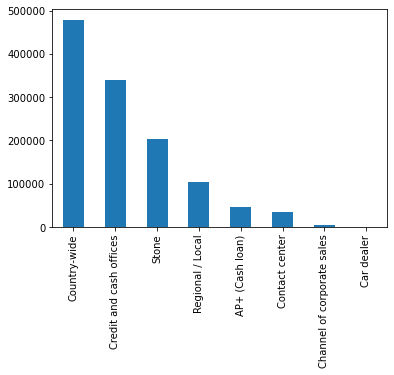

Chart Name : CNT_PAYMENT Mean : 15.842721852117634    Median : 12.0    Mode : 0    12.0
Name: CNT_PAYMENT, dtype: float64


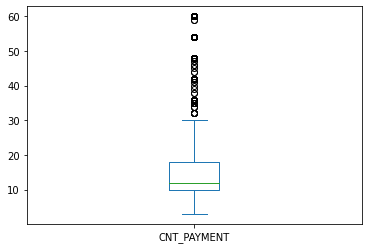

Chart Name : NAME_YIELD_GROUP


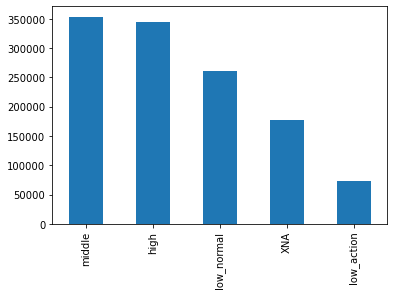

Chart Name : PRODUCT_COMBINATION


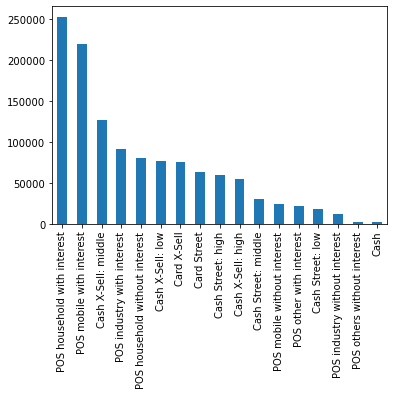

In [82]:
for i in range(len(Set_4_p)):
    if prev_app[Set_4_p[i]].dtype==object:
        print("Chart Name :",Set_4_p[i])
        prev_app[Set_4_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print("Chart Name :",Set_4_p[i], "Mean :",prev_app[Set_4_p[i]].mean(), "   Median :",prev_app[Set_4_p[i]].median(),"   Mode :",prev_app[Set_4_p[i]].mode())
        prev_app[Set_4_p[i]].plot(kind='box')
        plt.show()

### Bivariate Analysis (Set_4_p)

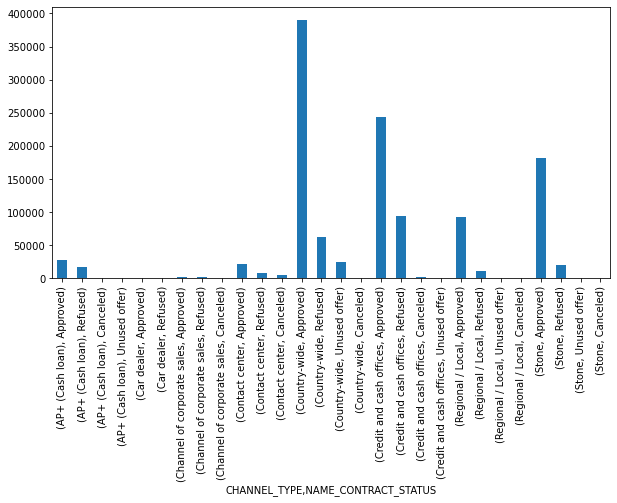

<Figure size 720x360 with 0 Axes>

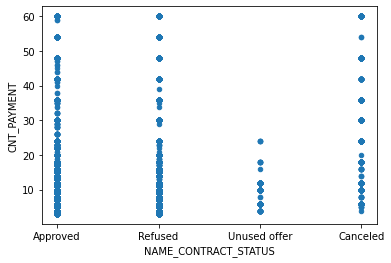

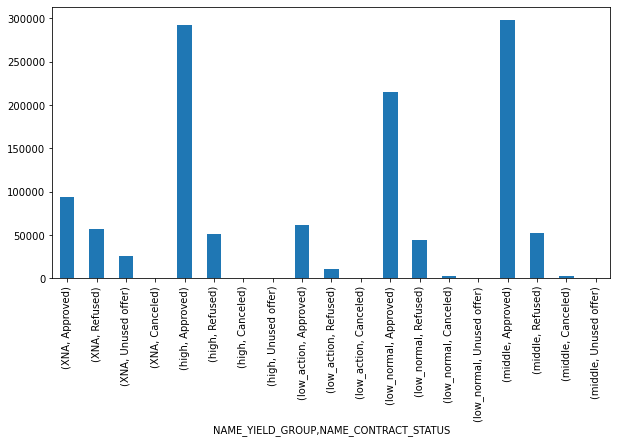

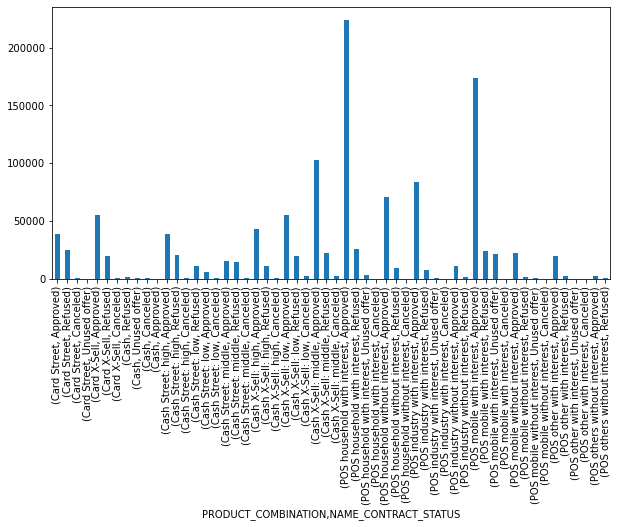

In [152]:
for i in range(1,len(Set_4_p)):
    if prev_app[Set_4_p[i]].dtype == object:
        plt.figure(figsize=(10,5))
        prev_app.groupby([Set_4_p[i]])['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
        plt.show()
    else:
        plt.figure(figsize=(10,5))
        prev_app.plot.scatter(x='NAME_CONTRACT_STATUS',y=Set_4_p[i])
        plt.show() 

### Segmented Univariate Analysis (Set_4_p)

CHANNEL_TYPE


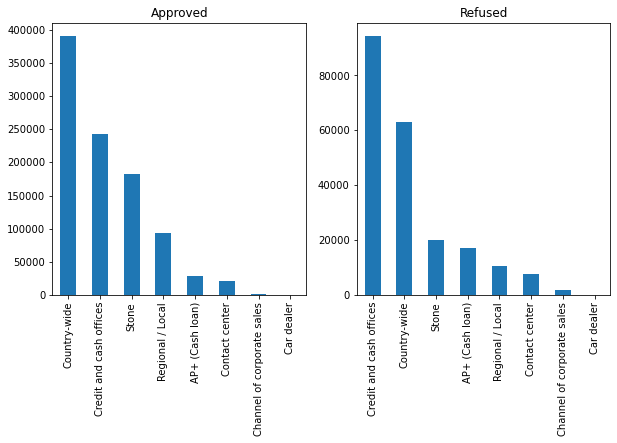

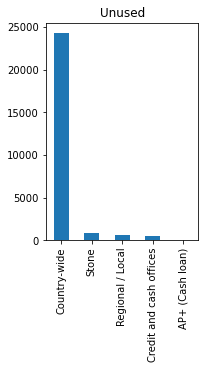

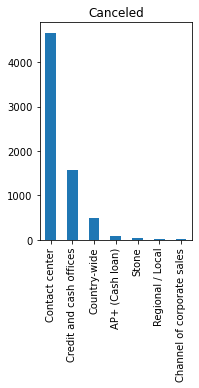

CNT_PAYMENT


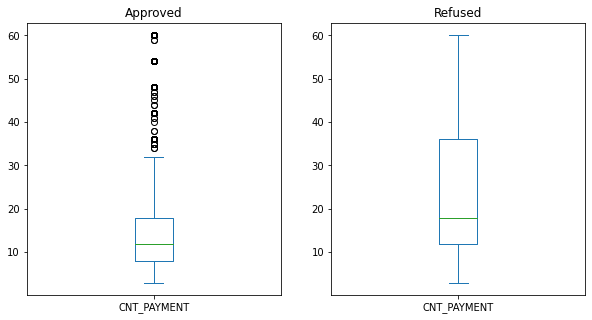

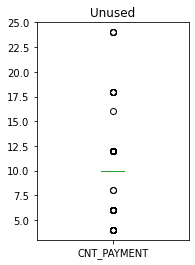

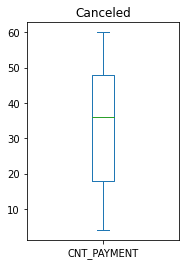

NAME_YIELD_GROUP


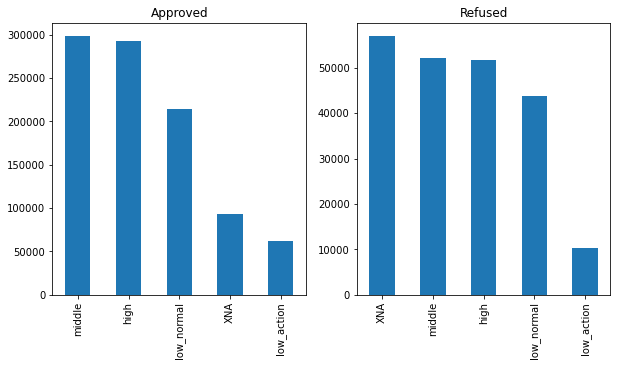

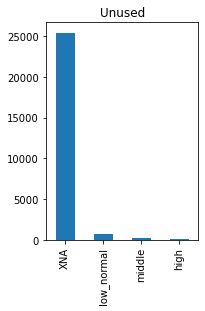

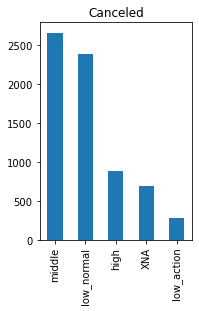

PRODUCT_COMBINATION


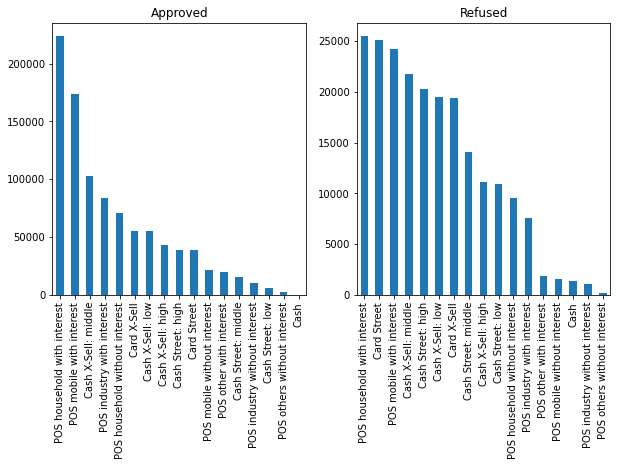

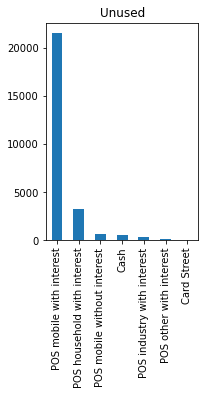

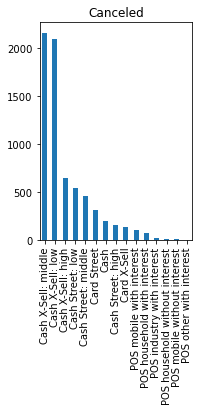

In [84]:
for i in range(1,len(Set_4_p)):
    if prev_app[Set_4_p[i]].dtype==object:
        print(Set_4_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_4_p[i]].value_counts().plot.bar()
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_4_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_4_p[i]].value_counts().plot.bar()
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_4_p[i]].value_counts().plot.bar()
        plt.show()
    else :
        print(Set_4_p[i])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Approved')
        prev_app_approved[Set_4_p[i]].plot(kind='box')
        plt.subplot(1,2,2)
        plt.title('Refused')
        prev_app_refused[Set_4_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Unused')
        prev_app_unused[Set_4_p[i]].plot(kind='box')
        plt.show()
        plt.subplot(1,2,2)
        plt.title('Canceled')
        prev_app_cancelled[Set_4_p[i]].plot(kind='box')
        plt.show()

# Combining Application Data and Previous Application

In [87]:
merged_data=pd.merge(app_data[['SK_ID_CURR','TARGET']],prev_app,how='inner',on='SK_ID_CURR')

In [89]:
merged_data.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,Y,1,NaN,XAP,Approved,606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,Y,1,0.100061,XAP,Approved,2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
2,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,Y,1,0.212008,XAP,Approved,815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
3,100006,0,2078043,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,Y,1,NaN,XNA,Approved,181,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,NaN,XNA,48.0,low_normal,Cash X-Sell: low
4,100006,0,1489396,Revolving loans,13500.000,270000.0,270000.0,NaN,270000.0,Y,1,NaN,XAP,Approved,181,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,NaN,XNA,NaN,XNA,Card X-Sell


### Bivariate Analysis on Merged Data

In [146]:
print('Shape :',merged_data.shape)
merged_data.describe()

Shape : (1030979, 28)


,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.030979e+06,1.030979e+06,1.030979e+06,998194.000000,1.030979e+06,1.030978e+06,643071.000000,985889.000000,1.030979e+06,335208.000000,1.030979e+06,724102.000000,881651.000000
mean,2.784864e+05,8.440909e-02,1.913315e+06,12760.782098,1.416340e+05,1.637922e+05,5078.004241,148137.863317,9.954315e-01,0.145208,1.084159e+03,445.660892,15.800539
std,1.027642e+05,2.780005e-01,5.342922e+05,9310.842566,1.449289e+05,1.671009e+05,7979.973620,144977.427108,6.743595e-02,0.094058,8.045157e+02,804.778764,11.589422
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000,0.000000e+00,0.000000e+00,-0.900000,0.000000,0.000000e+00,-0.000015,1.000000e+00,0.000000,3.000000
25%,1.895290e+05,0.000000e+00,1.446036e+06,5844.375000,4.500000e+04,4.730400e+04,0.000000,45000.000000,1.000000e+00,0.101374,4.170000e+02,28.000000,10.000000
50%,2.789610e+05,0.000000e+00,1.909064e+06,10147.702500,9.000000e+04,1.015110e+05,1575.000000,94000.500000,1.000000e+00,0.108909,8.380000e+02,69.000000,12.000000
75%,3.674275e+05,0.000000e+00,2.377136e+06,17005.050000,1.800000e+05,2.158650e+05,7182.000000,189000.000000,1.000000e+00,0.174555,1.648000e+03,350.000000,18.000000
max,4.562550e+05,1.000000e+00,2.845381e+06,53303.400000,6.795000e+05,9.000000e+05,45000.000000,765000.000000,1.000000e+00,0.831411,2.922000e+03,4596.000000,60.000000


#### Set_1_p Merged Analysis

<Figure size 720x360 with 0 Axes>

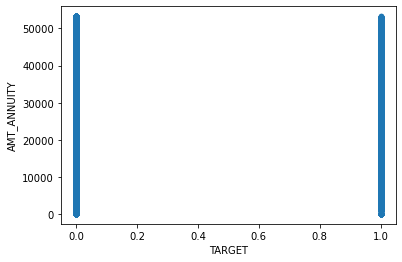

<Figure size 720x360 with 0 Axes>

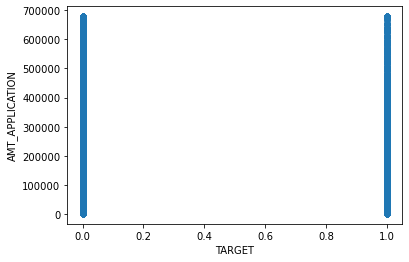

<Figure size 720x360 with 0 Axes>

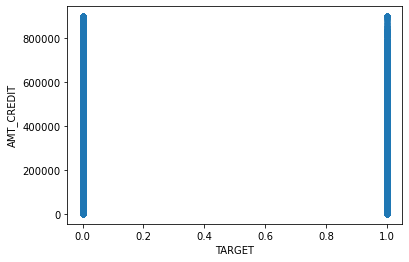

<Figure size 720x360 with 0 Axes>

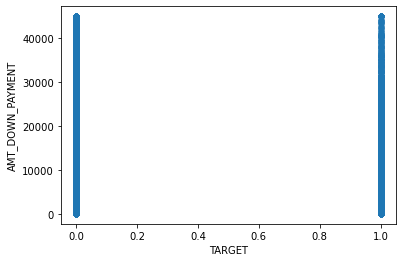

<Figure size 720x360 with 0 Axes>

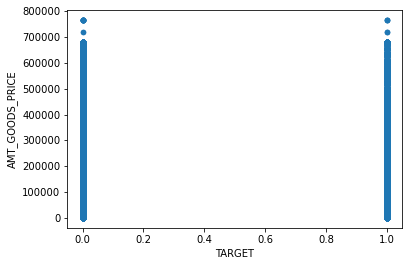

In [139]:
for i in range(len(Set_1_p)):
    if merged_data[Set_1_p[i]].dtype== object:
        plt.figure(figsize=(10,5))
        merged_data.groupby([Set_1_p[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else :
        plt.figure(figsize=(10,5))
        merged_data.plot.scatter(x='TARGET',y=Set_1_p[i])
        plt.show()

#### Set_2_p Merged Analysis

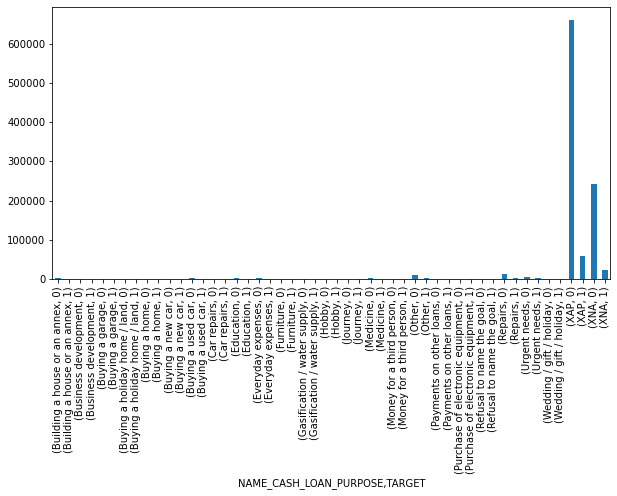

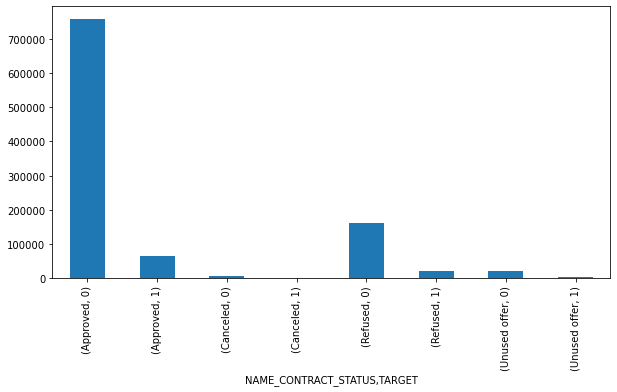

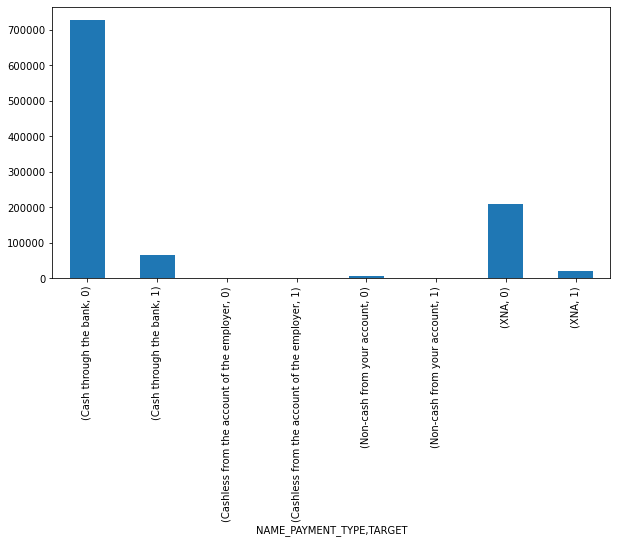

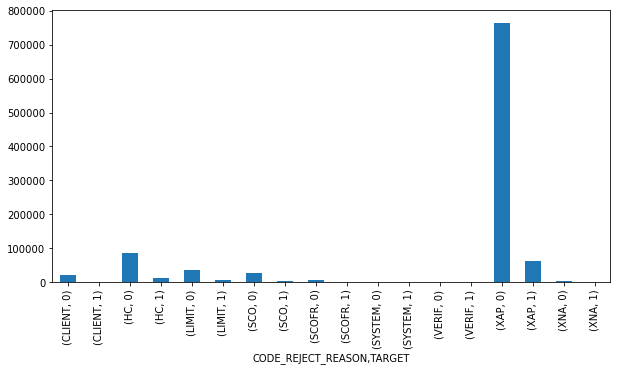

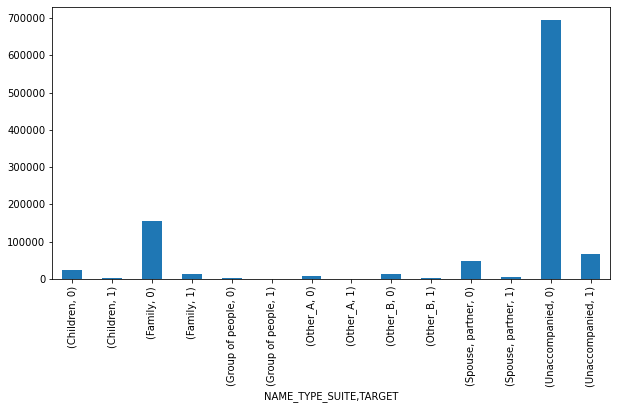

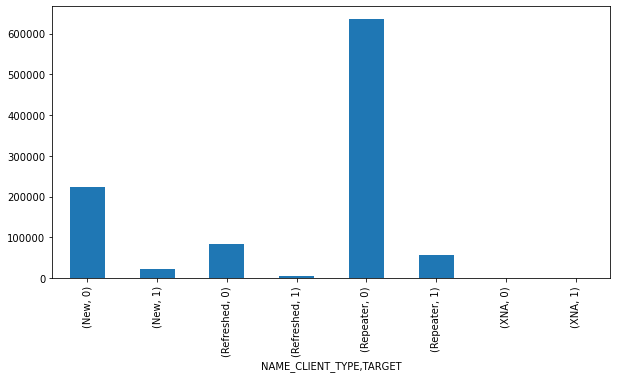

In [140]:
for i in range(len(Set_2_p)):
    if merged_data[Set_2_p[i]].dtype== object:
        plt.figure(figsize=(10,5))
        merged_data.groupby([Set_2_p[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else :
        plt.figure(figsize=(10,5))
        merged_data.plot.scatter(x='TARGET',y=Set_2_p[i])
        plt.show()

#### Set_3_p Merged Analysis

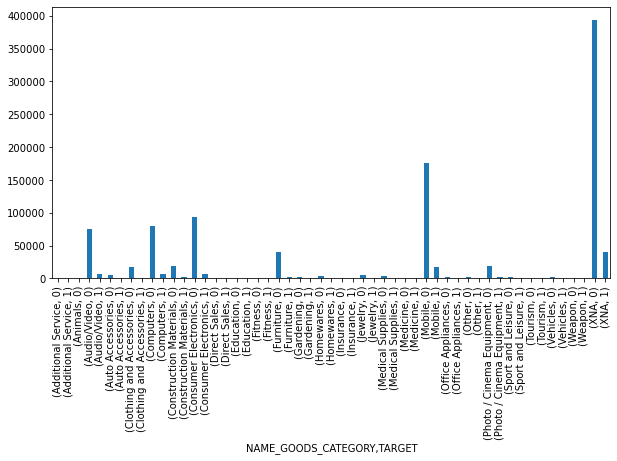

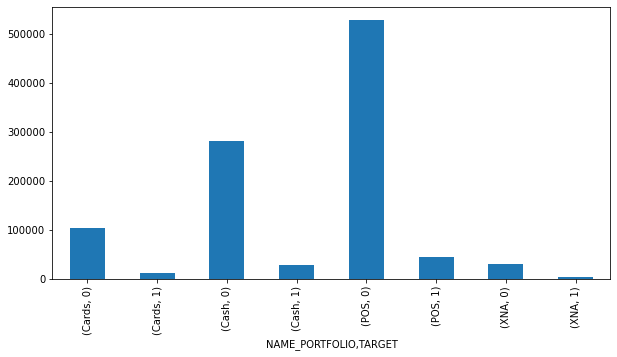

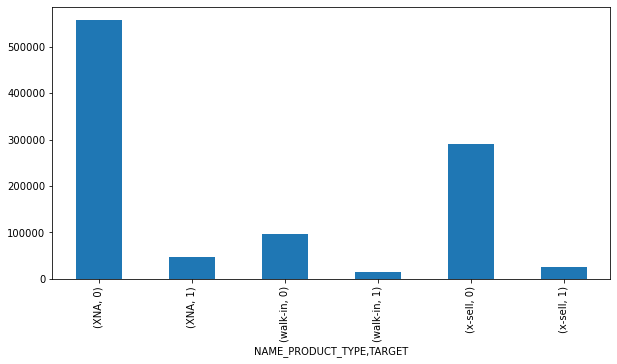

<Figure size 720x360 with 0 Axes>

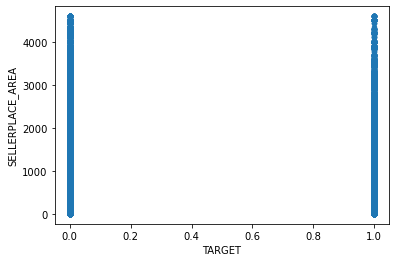

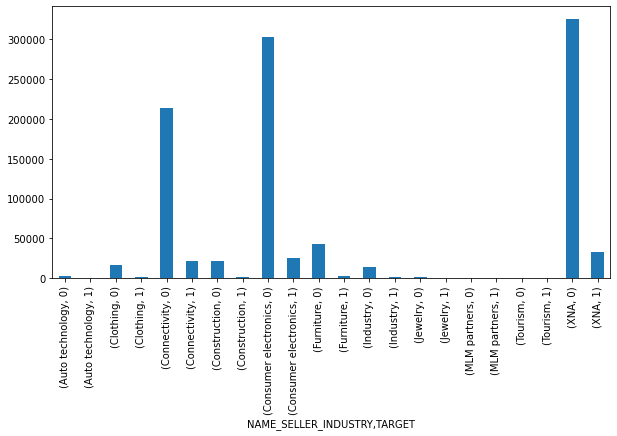

In [142]:
for i in range(len(Set_3_p)):
    if merged_data[Set_3_p[i]].dtype== object:
        plt.figure(figsize=(10,5))
        merged_data.groupby([Set_3_p[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else :
        plt.figure(figsize=(10,5))
        merged_data.plot.scatter(x='TARGET',y=Set_3_p[i])
        plt.show()

#### Set_4_p Merged Analysis

<Figure size 720x360 with 0 Axes>

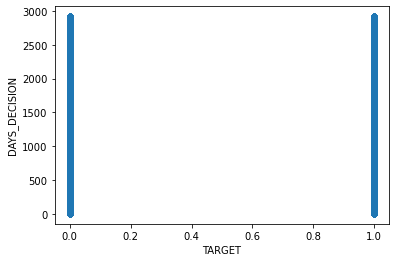

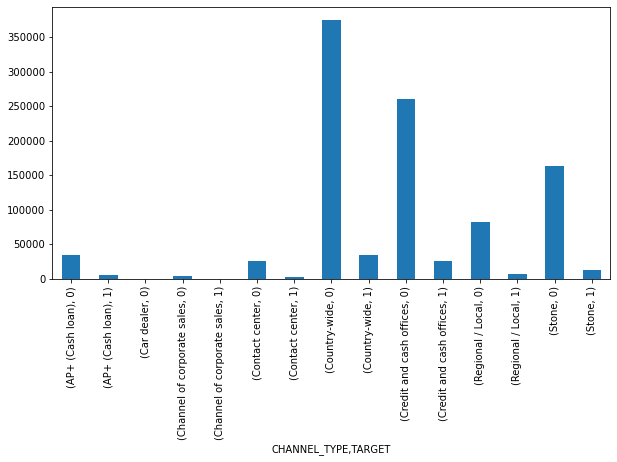

<Figure size 720x360 with 0 Axes>

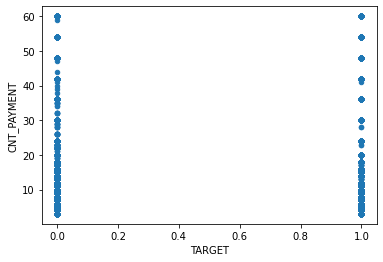

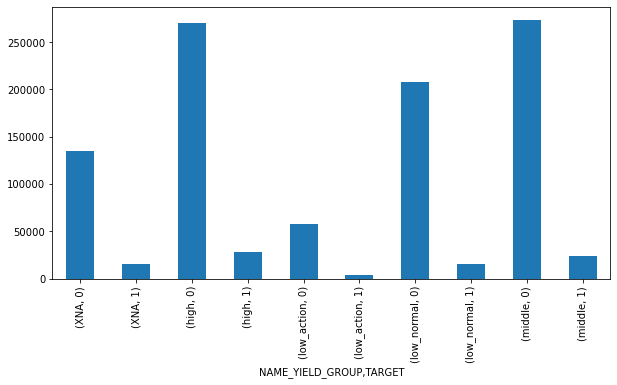

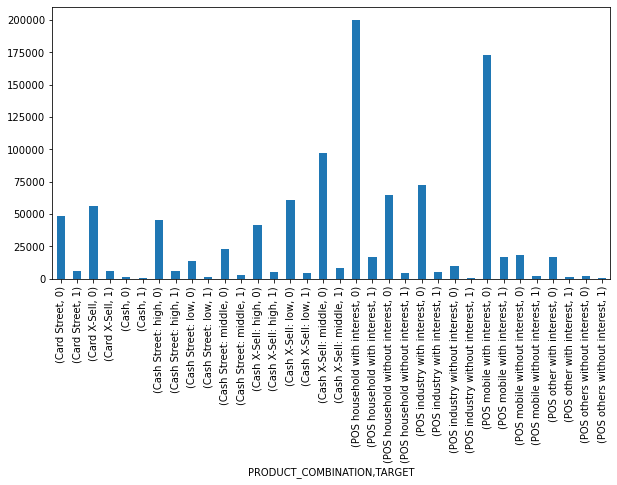

In [138]:
for i in range(len(Set_4_p)):
    if merged_data[Set_4_p[i]].dtype== object:
        plt.figure(figsize=(10,5))
        merged_data.groupby([Set_4_p[i]])['TARGET'].value_counts().plot.bar()
        plt.show()
    else :
        plt.figure(figsize=(10,5))
        merged_data.plot.scatter(x='TARGET',y=Set_4_p[i])
        plt.show()

## Correlation Data

In [338]:
Arr=app_data[['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
             'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS'
             ,'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE'
             ,'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'LIVE_CITY_NOT_WORK_CITY', 'DAYS_LAST_PHONE_CHANGE'
             ,'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]
Arr.head()

,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,NAME_TYPE_SUITE,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OCCUPATION_TYPE,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_CONT_MOBILE,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,202500.0,406597.5,24700.5,351000.0,M,N,Y,NaN,Secondary / secondary special,Single / not married,House / apartment,1.0,Unaccompanied,Working,9461,637,3648.0,Laborers,2120,1,1,0,1134.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,270000.0,1293502.5,35698.5,1129500.0,F,N,N,NaN,Higher education,Married,House / apartment,2.0,Family,State servant,16765,1188,1186.0,Core staff,291,1,1,0,828.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,67500.0,135000.0,6750.0,135000.0,M,Y,Y,NaN,Secondary / secondary special,Single / not married,House / apartment,1.0,Unaccompanied,Working,19046,225,4260.0,Laborers,2531,1,1,0,815.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,135000.0,312682.5,29686.5,297000.0,F,N,Y,NaN,Secondary / secondary special,Civil marriage,House / apartment,2.0,Unaccompanied,Working,19005,3039,9833.0,Laborers,2437,1,1,0,617.0,NaN,NaN,NaN,NaN,NaN
4,Cash loans,121500.0,513000.0,21865.5,513000.0,M,N,Y,NaN,Secondary / secondary special,Single / not married,House / apartment,1.0,Unaccompanied,Working,19932,3038,4311.0,Core staff,3458,1,1,1,1106.0,0.0,0.0,0.0,0.0,0.0


### Correlation Matrix

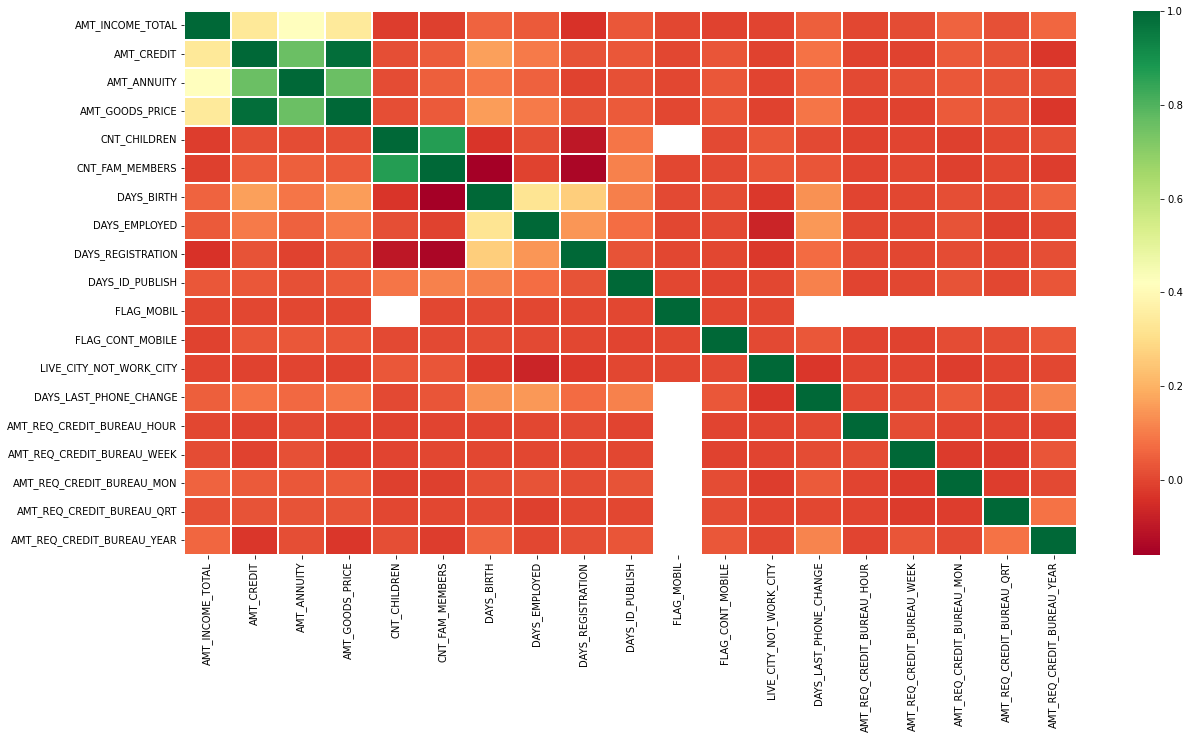

In [339]:

arr=Arr.corr(method ='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(arr, cmap ='RdYlGn', linewidths = 0.30, annot = False)
plt.show()

### Top 10 Correlation

In [340]:
ar=arr.unstack()
so=ar.sort_values(kind='quicksort')
So2=so[~so.isnull()]
print(So2[so!=1].tail(10))

AMT_ANNUITY       AMT_INCOME_TOTAL    0.415808
AMT_INCOME_TOTAL  AMT_ANNUITY         0.415808
AMT_ANNUITY       AMT_GOODS_PRICE     0.757603
AMT_GOODS_PRICE   AMT_ANNUITY         0.757603
AMT_ANNUITY       AMT_CREDIT          0.758192
AMT_CREDIT        AMT_ANNUITY         0.758192
CNT_FAM_MEMBERS   CNT_CHILDREN        0.865417
CNT_CHILDREN      CNT_FAM_MEMBERS     0.865417
AMT_CREDIT        AMT_GOODS_PRICE     0.983127
AMT_GOODS_PRICE   AMT_CREDIT          0.983127
dtype: float64
